AWS SAAS SALES ANALISIS

Konteks Perusahaan
AWS SaaS Sales (Software as a Service) adalah model bisnis yang menyediakan layanan perangkat lunak berbasis cloud. Dalam model ini, pelanggan membayar biaya berlangganan untuk mengakses perangkat lunak yang dihosting di server AWS (Amazon Web Services). AWS, sebagai penyedia layanan cloud, memungkinkan bisnis untuk menjalankan aplikasi tanpa harus mengelola infrastruktur server fisik. Layanan ini populer di kalangan perusahaan karena fleksibilitasnya, kemampuan untuk mengakses aplikasi dari mana saja, dan skalabilitas tinggi yang ditawarkan oleh solusi berbasis cloud.

Tujuan Bisnis
Untuk AWS atau bisnis yang menawarkan SaaS melalui AWS, tujuan utamanya adalah memaksimalkan pendapatan dan profitabilitas dari langganan SaaS mereka, serta menjaga kepuasan dan loyalitas pelanggan. Ini dapat dicapai dengan:

Memperluas basis pelanggan dengan menarik pelanggan baru.
Meningkatkan retensi pelanggan dengan memastikan pelanggan yang ada terus memperbarui langganan mereka.
Meningkatkan profitabilitas dengan menyesuaikan penawaran dan harga layanan serta meminimalkan diskon yang mengurangi margin keuntungan.

ANALISIS


Proyek ini bertujuan untuk menganalisis data penjualan SaaS guna mendapatkan wawasan yang relevan bagi perusahaan dalam mengelola profitabilitas, efektivitas diskon, dan margin produk.

## Permasalahan Bisnis
Dalam proyek ini, kita akan mengidentifikasi beberapa permasalahan utama:
1. **Profitabilitas Pelanggan**: Bagaimana perusahaan dapat mengidentifikasi pelanggan bernilai tinggi yang perlu diprioritaskan untuk retensi?
2. **Efektivitas Diskon**: Apakah pemberian diskon berdampak positif atau negatif terhadap volume penjualan dan profitabilitas?
3. **Margin Keuntungan Produk**: Produk mana yang memberikan margin keuntungan tertinggi dan sebaiknya difokuskan dalam strategi pemasaran?


## Tujuan Analisis
1. Mengelompokkan pelanggan berdasarkan total profit yang mereka hasilkan untuk menentukan pelanggan dengan profit tinggi, sedang, dan rendah.
2. Mengukur dampak diskon pada penjualan (kuantitas terjual) dan profit untuk memahami apakah diskon meningkatkan penjualan atau menurunkan profit.
3. Menganalisis margin profit per produk untuk mengetahui produk mana yang paling menguntungkan.


## TAHAP PERTAMA: LOAD DATASET

In [112]:
import pandas as pd

# Muat dataset (sesuaikan path dengan lokasi file dataset kamu)
file_path = '/Users/mhusnimaulana/Downloads/SaaS-Sales.csv'  # Ganti dengan path yang benar
saas_sales_data = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama untuk melihat struktur data
print("Beberapa baris pertama dari dataset:")
print(saas_sales_data.head())

# Informasi umum tentang dataset
print("\nInformasi dataset:")
print(saas_sales_data.info())

# Statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif untuk kolom numerik:")
print(saas_sales_data.describe())


Beberapa baris pertama dari dataset:
   Row ID          Order ID  Order Date  Date Key    Contact Name  \
0       1  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
1       2  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
2       3  AMER-2022-138688   6/13/2022  20220613  Deirdre Bailey   
3       4  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   
4       5  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   

         Country           City Region Subregion           Customer  \
0        Ireland         Dublin   EMEA      UKIR            Chevron   
1        Ireland         Dublin   EMEA      UKIR            Chevron   
2  United States  New York City   AMER     NAMER        Phillips 66   
3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   

   Customer ID Industry    Segment                 Product     License  \
0         1017   Energy        SMB         Mark

## Deskripsi Dataset

Dataset ini berisi informasi tentang penjualan SaaS (Software as a Service) dari berbagai pelanggan di beberapa wilayah. Berikut adalah penjelasan singkat mengenai beberapa kolom penting dalam dataset:

1. **Order ID**: Identifikasi unik untuk setiap pesanan.
2. **Order Date**: Tanggal pemesanan dilakukan.
3. **Country, City, Region, Subregion**: Informasi geografis yang menunjukkan lokasi pelanggan.
4. **Customer**: Nama pelanggan yang melakukan pembelian.
5. **Customer ID**: ID unik untuk setiap pelanggan.
6. **Industry**: Industri tempat pelanggan berada (misalnya, Energy, Finance, dll).
7. **Segment**: Segmen pelanggan, seperti *SMB* (Small and Medium Business) atau *Strategic*.
8. **Product**: Nama produk yang dibeli.
9. **License**: Lisensi unik untuk produk yang dijual.
10. **Sales**: Jumlah penjualan dalam nilai moneter.
11. **Quantity**: Jumlah unit produk yang dibeli dalam satu pesanan.
12. **Discount**: Diskon yang diberikan untuk setiap pembelian (dalam persentase).
13. **Profit**: Profit atau keuntungan yang diperoleh dari setiap penjualan setelah memperhitungkan biaya.

Dataset ini akan dianalisis lebih lanjut untuk mengidentifikasi pelanggan bernilai tinggi, mengevaluasi efektivitas diskon, dan membandingkan margin keuntungan antar produk.


## TAHAP KEDUA 
DATA UNDERSTANDING
Memahami isi dataset dengan mengeksplorasi fitur-fitur yang ada, ukuran data, dan karakteristik masing-masing kolom. Ini penting untuk memastikan kita memahami konteks dari setiap variabel sebelum melakukan analisis lebih lanjut.


In [114]:
# Ukuran dataset (jumlah baris dan kolom)
print("Dataset shape:", saas_sales_data.shape)

# Informasi dasar tentang dataset
print("\nDataset Info:")
saas_sales_data.info()

# Deskripsi statistik untuk kolom numerik
print("\nDeskripsi Statistik Kolom Numerik:")
print(saas_sales_data.describe())

# Memeriksa jumlah nilai unik di kolom penting
print("\nJumlah nilai unik per kolom:")
print("Customer:", saas_sales_data['Customer'].nunique())
print("Product:", saas_sales_data['Product'].nunique())
print("Region:", saas_sales_data['Region'].nunique())
print("Discount levels:", saas_sales_data['Discount'].unique())


Dataset shape: (9994, 19)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   

Ukuran Dataset: Dataset ini memiliki 9,994 baris dan 19 kolom.
Tipe Data:
Beberapa kolom memiliki tipe data yang perlu diperhatikan, misalnya:
Order Date masih dalam format object, yang sebaiknya dikonversi ke datetime. (Tahap Data Cleaning)
Kolom Date Key mungkin adalah alternatif representasi tanggal dalam format numerik, tetapi bisa jadi kita tidak memerlukannya jika sudah ada Order Date yang lebih mudah dibaca.
Kolom numerik seperti Sales dan Quantity sudah memiliki tipe data yang sesuai (float64 untuk Sales dan int64 untuk Quantity).
Jumlah Nilai Unik:
Customer: Ada 99 pelanggan yang unik, yang memberikan variasi cukup untuk analisis segmentasi.
Product: Hanya ada 14 jenis produk, yang berarti analisis margin keuntungan antar produk akan tetap sederhana namun informatif.
Region: Ada 3 wilayah (kemungkinan besar wilayah seperti AMER, EMEA, atau APAC), yang memungkinkan kita melakukan analisis berbasis wilayah jika diperlukan.
Discount levels: Ada beberapa level diskon unik, yang akan berguna untuk analisis efektivitas diskon.

## TAHAP 3: DATA CLEANING

Memastikan data bersih dan siap digunakan untuk analisis lebih lanjut dengan menangani potensi masalah seperti tipe data yang tidak sesuai, data duplikat, atau nilai yang tidak valid. Sebelumnya saya menemukamn nilai profit negatif sangat extreme sehingga saya membuat threeshold ambang batas hanya mengambil nilai ekstrim -1000


In [128]:
import pandas as pd

# Load data
saas_sales_data = pd.read_csv('/Users/mhusnimaulana/Downloads/SaaS-Sales.csv')

# 1. Memeriksa nilai hilang
print("Missing values per column:\n", saas_sales_data.isnull().sum())

# 2. Menghapus baris duplikat
initial_shape = saas_sales_data.shape
saas_sales_data = saas_sales_data.drop_duplicates()
print(f"Removed {initial_shape[0] - saas_sales_data.shape[0]} duplicate rows.")

# 3. Mengonversi kolom 'Order Date' ke format datetime
saas_sales_data['Order Date'] = pd.to_datetime(saas_sales_data['Order Date'], errors='coerce')
print("\nData types after conversion:\n", saas_sales_data.dtypes)

# 4. Periksa anomali pada kolom numerik (Sales, Quantity, Discount)
# Pastikan tidak ada nilai negatif di Sales dan Quantity
print("\nChecking for negative values:")
print("Negative Sales values:", (saas_sales_data['Sales'] < 0).sum())
print("Negative Quantity values:", (saas_sales_data['Quantity'] < 0).sum())

# 5. Menghapus profit negatif ekstrem
# Menentukan ambang batas profit negatif yang dianggap anomali
profit_threshold = -1000

# Menampilkan jumlah data sebelum pembersihan profit negatif ekstrem
print(f"\nJumlah data sebelum pembersihan profit negatif ekstrem: {saas_sales_data.shape[0]}")

# Filter untuk menghapus data dengan profit negatif yang sangat besar (di bawah ambang batas)
saas_sales_data_cleaned = saas_sales_data[saas_sales_data['Profit'] >= profit_threshold]

# Menampilkan jumlah data setelah pembersihan profit negatif ekstrem
print(f"Jumlah data setelah pembersihan profit negatif ekstrem: {saas_sales_data_cleaned.shape[0]}")

# Menampilkan beberapa baris pertama dari data bersih untuk verifikasi
print(saas_sales_data_cleaned.head())

# Dataset segmentasi pelanggan
# Menghitung total profit per pelanggan dan membuat segmen
customer_profit_data = saas_sales_data_cleaned.groupby('Customer')['Profit'].sum().reset_index()

# Menentukan batas untuk segmentasi
low_threshold = customer_profit_data['Profit'].quantile(0.33)
high_threshold = customer_profit_data['Profit'].quantile(0.67)

# Fungsi untuk mengklasifikasikan segmen pelanggan
def profit_segment(profit):
    if profit >= high_threshold:
        return 'High Profit'
    elif profit <= low_threshold:
        return 'Low Profit'
    else:
        return 'Medium Profit'

# Terapkan segmentasi berdasarkan profit
customer_profit_data['Profit Segment'] = customer_profit_data['Profit'].apply(profit_segment)

# 6. Mengekspor data bersih dan segmentasi pelanggan ke dalam file Excel
with pd.ExcelWriter('Cleaned_SaaS_Sales_and_Segmentation.xlsx') as writer:
    saas_sales_data_cleaned.to_excel(writer, sheet_name='SaaS_Sales_Cleaned', index=False)
    customer_profit_data.to_excel(writer, sheet_name='Customer_Segmentation', index=False)

print("Data cleaned and segmentation exported to 'Cleaned_SaaS_Sales_and_Segmentation.xlsx'")


Missing values per column:
 Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64
Removed 0 duplicate rows.

Data types after conversion:
 Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key                 int64
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID              int64
Industry                object
Segment                 object
Product                 object
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Pr

In [117]:
# Ukuran dataset (jumlah baris dan kolom)
print("Dataset shape:", saas_sales_data.shape)

# Informasi dasar tentang dataset
print("\nDataset Info:")
saas_sales_data.info()

# Deskripsi statistik untuk kolom numerik
print("\nDeskripsi Statistik Kolom Numerik:")
print(saas_sales_data.describe())

# Memeriksa jumlah nilai unik di kolom penting
print("\nJumlah nilai unik per kolom:")
print("Customer:", saas_sales_data['Customer'].nunique())
print("Product:", saas_sales_data['Product'].nunique())
print("Region:", saas_sales_data['Region'].nunique())
print("Discount levels:", saas_sales_data['Discount'].unique())


Dataset shape: (9994, 19)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 1

## TAHAP 4  ANALISIS AWAL 
Membuat Analisis Deskriptif dan Visualisasi Awal

Statistik deskriptif untuk kolom numerik:

              Sales     Quantity     Discount       Profit
count   9972.000000  9972.000000  9972.000000  9972.000000
mean     222.566875     3.784898     0.155123    33.291778
std      563.301002     2.222901     0.205235   203.434439
min        0.444000     1.000000     0.000000  -968.883300
25%       17.220000     2.000000     0.000000     1.763200
50%       54.088000     3.000000     0.200000     8.692000
75%      208.470000     5.000000     0.200000    29.439275
max    17499.950000    14.000000     0.800000  8399.976000

Insight:
- Sales: Rata-rata penjualan adalah 222.57 dengan standar deviasi 563.30, menunjukkan variabilitas tinggi dengan beberapa transaksi besar.
- Quantity: Rata-rata jumlah produk yang terjual adalah 3.78, menunjukkan sebagian besar transaksi dalam jumlah kecil.
- Discount: Diskon rata-rata adalah 15.51%, menunjukkan kebanyakan transaksi memiliki diskon rendah atau tanpa diskon.
- Profit: Rata-rata profit adalah 33.29

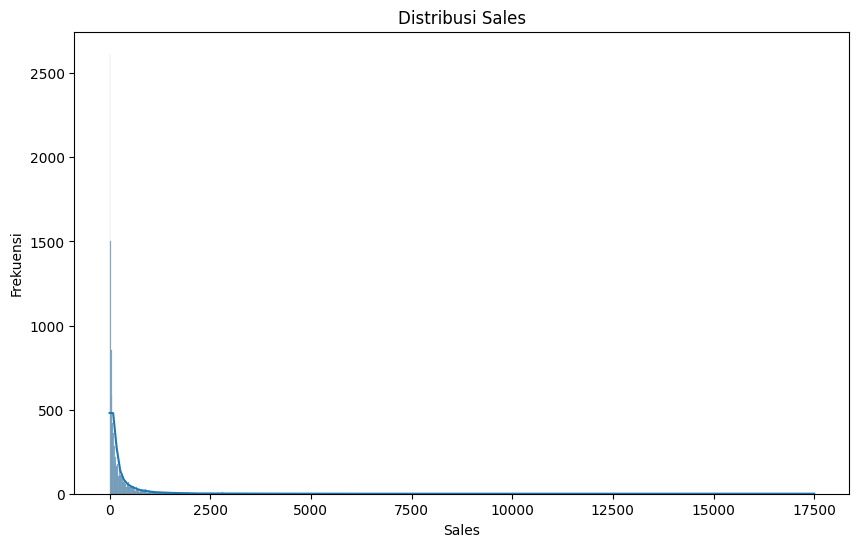


Insight Distribusi Sales:
- Distribusi Sales miring ke kanan, menunjukkan sebagian besar transaksi memiliki nilai penjualan rendah dan hanya sedikit yang bernilai tinggi.


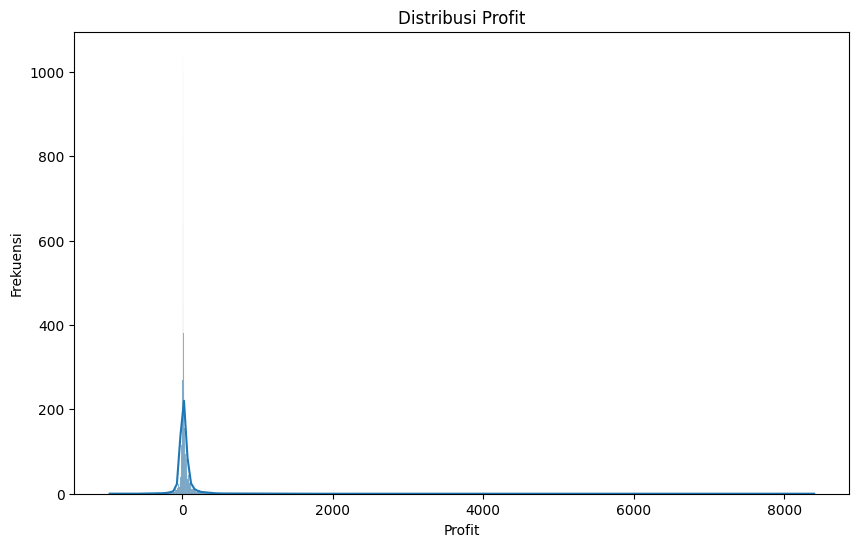


Insight Distribusi Profit:
- Profit juga miring ke kanan, dengan sebagian besar transaksi menghasilkan profit rendah. Hanya beberapa transaksi yang menghasilkan profit tinggi.


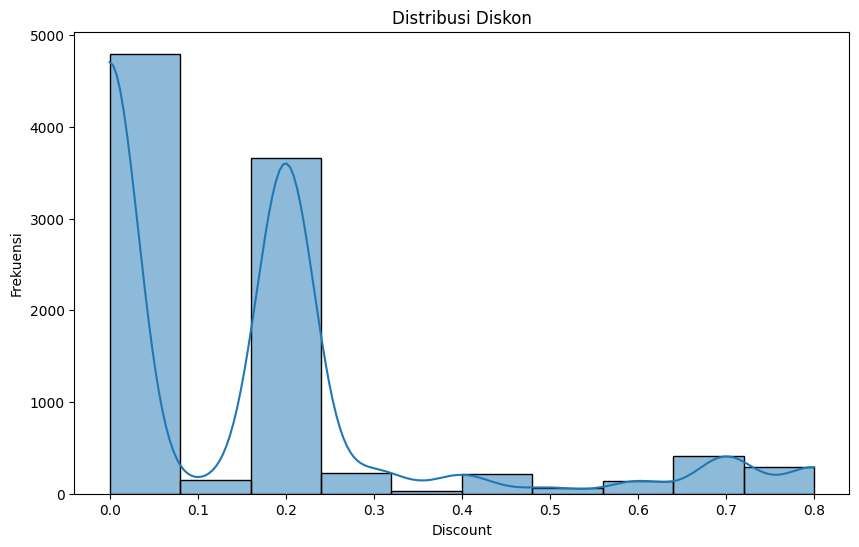


Insight Distribusi Diskon:
- Sebagian besar diskon berada di sekitar 0% atau 20%, menunjukkan kebijakan diskon yang umumnya rendah dan konsisten.


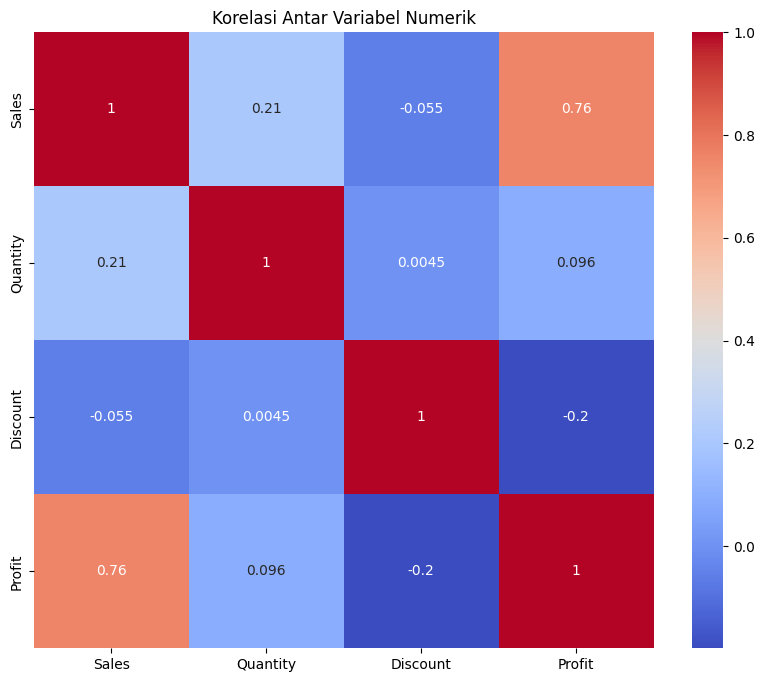


Insight Korelasi Antar Variabel:
- Sales dan Profit memiliki korelasi positif tinggi (0.76), menunjukkan bahwa penjualan lebih tinggi cenderung menghasilkan profit lebih tinggi.
- Discount dan Profit memiliki korelasi negatif (-0.2), menunjukkan adanya efek diskon terhadap penurunan profit, meskipun tidak terlalu signifikan.
- Quantity dan Sales memiliki korelasi positif (0.21), menunjukkan bahwa peningkatan kuantitas berhubungan dengan peningkatan penjualan, meskipun tidak kuat.


In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Statistik Deskriptif
print("Statistik deskriptif untuk kolom numerik:\n")
print(saas_sales_data_cleaned[['Sales', 'Quantity', 'Discount', 'Profit']].describe())

# Menambahkan insight langsung setelah statistik deskriptif
print("\nInsight:")
print("- Sales: Rata-rata penjualan adalah 222.57 dengan standar deviasi 563.30, menunjukkan variabilitas tinggi dengan beberapa transaksi besar.")
print("- Quantity: Rata-rata jumlah produk yang terjual adalah 3.78, menunjukkan sebagian besar transaksi dalam jumlah kecil.")
print("- Discount: Diskon rata-rata adalah 15.51%, menunjukkan kebanyakan transaksi memiliki diskon rendah atau tanpa diskon.")
print("- Profit: Rata-rata profit adalah 33.29, namun terdapat profit negatif besar yang mungkin disebabkan oleh biaya tinggi atau kebijakan harga.")

# 2. Visualisasi Distribusi Data

# Distribusi Sales
plt.figure(figsize=(10, 6))
sns.histplot(saas_sales_data_cleaned['Sales'], kde=True)
plt.title('Distribusi Sales')
plt.xlabel('Sales')
plt.ylabel('Frekuensi')
plt.show()

# Insight setelah distribusi Sales
print("\nInsight Distribusi Sales:")
print("- Distribusi Sales miring ke kanan, menunjukkan sebagian besar transaksi memiliki nilai penjualan rendah dan hanya sedikit yang bernilai tinggi.")

# Distribusi Profit
plt.figure(figsize=(10, 6))
sns.histplot(saas_sales_data_cleaned['Profit'], kde=True)
plt.title('Distribusi Profit')
plt.xlabel('Profit')
plt.ylabel('Frekuensi')
plt.show()

# Insight setelah distribusi Profit
print("\nInsight Distribusi Profit:")
print("- Profit juga miring ke kanan, dengan sebagian besar transaksi menghasilkan profit rendah. Hanya beberapa transaksi yang menghasilkan profit tinggi.")

# Distribusi Diskon
plt.figure(figsize=(10, 6))
sns.histplot(saas_sales_data_cleaned['Discount'], kde=True, bins=10)
plt.title('Distribusi Diskon')
plt.xlabel('Discount')
plt.ylabel('Frekuensi')
plt.show()

# Insight setelah distribusi Diskon
print("\nInsight Distribusi Diskon:")
print("- Sebagian besar diskon berada di sekitar 0% atau 20%, menunjukkan kebijakan diskon yang umumnya rendah dan konsisten.")

# 3. Korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(saas_sales_data_cleaned[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

# Insight setelah heatmap korelasi
print("\nInsight Korelasi Antar Variabel:")
print("- Sales dan Profit memiliki korelasi positif tinggi (0.76), menunjukkan bahwa penjualan lebih tinggi cenderung menghasilkan profit lebih tinggi.")
print("- Discount dan Profit memiliki korelasi negatif (-0.2), menunjukkan adanya efek diskon terhadap penurunan profit, meskipun tidak terlalu signifikan.")
print("- Quantity dan Sales memiliki korelasi positif (0.21), menunjukkan bahwa peningkatan kuantitas berhubungan dengan peningkatan penjualan, meskipun tidak kuat.")


## TAHAP 5
Analisis Spesifik: Segmentasi Pelanggan Berdasarkan Profitabilitas

Pelanggan di segmen High Profit:
                    Customer      Profit Profit Segment
0                       AT&T   4520.6641    High Profit
3                     Airbus   5593.3657    High Profit
4                    Allianz   5531.8834    High Profit
8           American Express   5436.2589    High Profit
10                    Anthem   5953.2038    High Profit
13                       BMW   5948.0993    High Profit
14               BNP Paribas   5550.8063    High Profit
16     Bank of America Corp.   6449.8554    High Profit
24  China National Petroleum   4496.3264    High Profit
28                 Coca-Cola   9449.0246    High Profit
45                Home Depot   5279.8129    High Profit
53         Johnson & Johnson   4632.4593    High Profit
54                    Kroger   6256.1005    High Profit
55                     Lowes   7937.4915    High Profit
56                    Lukoil   7117.0922    High Profit
62    Mondelez International   8577.6524    High Profit
70             

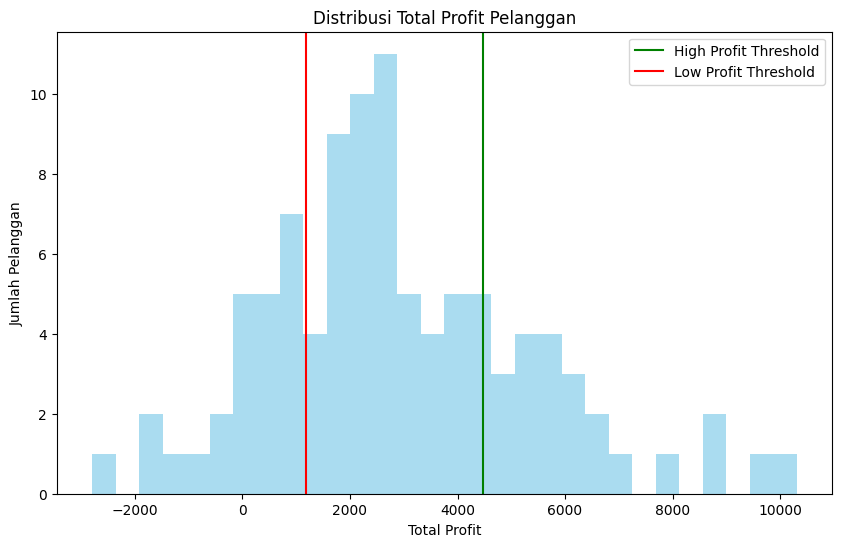

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Memuat data
customer_profit_data = pd.read_csv('/Users/mhusnimaulana/Downloads/SaaS-Sales.csv')

# Hitung total profit per pelanggan
total_profit_per_customer = customer_profit_data.groupby('Customer')['Profit'].sum().reset_index()

# Mendefinisikan batas untuk segmen profit
high_profit_threshold = total_profit_per_customer['Profit'].quantile(0.75)  # ambang batas tinggi
low_profit_threshold = total_profit_per_customer['Profit'].quantile(0.25)   # ambang batas rendah

# Fungsi untuk mengklasifikasikan segmen berdasarkan profit
def classify_profit_segment(profit):
    if profit >= high_profit_threshold:
        return 'High Profit'
    elif profit <= low_profit_threshold:
        return 'Low Profit'
    else:
        return 'Medium Profit'

# Terapkan klasifikasi ke DataFrame
total_profit_per_customer['Profit Segment'] = total_profit_per_customer['Profit'].apply(classify_profit_segment)

# Print daftar pelanggan per segmen
print("Pelanggan di segmen High Profit:")
print(total_profit_per_customer[total_profit_per_customer['Profit Segment'] == 'High Profit'])

print("\nPelanggan di segmen Medium Profit:")
print(total_profit_per_customer[total_profit_per_customer['Profit Segment'] == 'Medium Profit'])

print("\nPelanggan di segmen Low Profit:")
print(total_profit_per_customer[total_profit_per_customer['Profit Segment'] == 'Low Profit'])

# Visualisasi
plt.figure(figsize=(10, 6))
plt.hist(total_profit_per_customer['Profit'], bins=30, color='skyblue', alpha=0.7)
plt.axvline(high_profit_threshold, color='green', label='High Profit Threshold')
plt.axvline(low_profit_threshold, color='red', label='Low Profit Threshold')
plt.title('Distribusi Total Profit Pelanggan')
plt.xlabel('Total Profit')
plt.ylabel('Jumlah Pelanggan')
plt.legend()
plt.show()


/var/folders/7l/8hp65y4x3nj9c97k5f9jmsvh0000gn/T/ipykernel_14920/2253416451.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Profit Segment", loc='upper right')


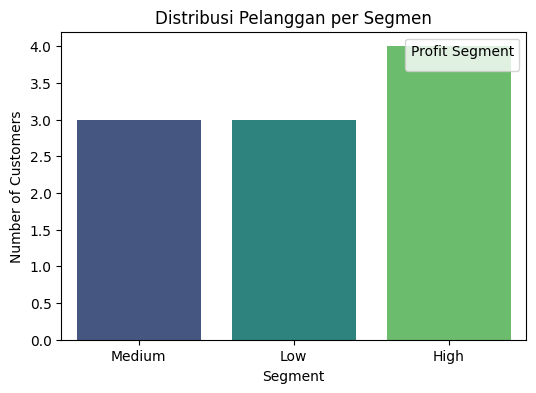


Pelanggan di segmen High:
  Customer  Profit
2        C     400
6        G     600
7        H     500
8        I     350

Pelanggan di segmen Medium:
  Customer  Profit
0        A     200
3        D     300
4        E     250

Pelanggan di segmen Low:
  Customer  Profit
1        B     150
5        F     100
9        J      50


In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh data
data = {
    'Customer': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Profit': [200, 150, 400, 300, 250, 100, 600, 500, 350, 50]
}
customer_profit_data = pd.DataFrame(data)

# Langkah 1: Hitung kuantil
quantiles = customer_profit_data['Profit'].quantile([0.33, 0.66])
low_threshold, high_threshold = quantiles[0.33], quantiles[0.66]

# Langkah 2: Segmentasi pelanggan
def segment_customer(profit):
    if profit <= low_threshold:
        return 'Low'
    elif profit <= high_threshold:
        return 'Medium'
    else:
        return 'High'

customer_profit_data['Segment'] = customer_profit_data['Profit'].apply(segment_customer)

# Langkah 3: Analisis distribusi
segment_counts = customer_profit_data['Segment'].value_counts()

# Visualisasi
plt.figure(figsize=(6, 4))
sns.countplot(x='Segment', data=customer_profit_data, hue='Segment', palette='viridis', dodge=False)
plt.title('Distribusi Pelanggan per Segmen')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.legend(title="Profit Segment", loc='upper right')
plt.show()

# Langkah 4: Menampilkan daftar pelanggan per segmen
for segment in ['High', 'Medium', 'Low']:
    print(f"\nPelanggan di segmen {segment}:")
    filtered_data = customer_profit_data[customer_profit_data['Segment'] == segment]
    print(filtered_data[['Customer', 'Profit']])


In [120]:
print("Nama kolom yang ada dalam dataset:")
print(customer_profit_data.columns)


Nama kolom yang ada dalam dataset:
Index(['Customer', 'Profit', 'Segment'], dtype='object')


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Asumsi bahwa data sudah dimuat dalam dataframe `customer_profit_data`

# Mengkonversi 'Order Date' ke datetime
customer_profit_data['Order Date'] = pd.to_datetime(customer_profit_data['Order Date'])

# Menambahkan kolom bulan dan tahun
customer_profit_data['Year'] = customer_profit_data['Order Date'].dt.year
customer_profit_data['Month'] = customer_profit_data['Order Date'].dt.month

# Membuat segmen profit berdasarkan threshold yang ditentukan
thresholds = [200, 500]  # Ambang batas untuk segmen Low, Medium, dan High
labels = ['Low', 'Medium', 'High']
customer_profit_data['Profit Segment'] = pd.cut(customer_profit_data['Profit'], bins=[-np.inf] + thresholds + [np.inf], labels=labels)

# Mengelompokkan data berdasarkan tahun, bulan, dan segmen profit
grouped_data = customer_profit_data.groupby(['Year', 'Month', 'Profit Segment']).agg({
    'Profit': 'mean'
}).unstack('Profit Segment')  # Unstack untuk membuat kolom profit segment sebagai kolom terpisah

# Plotting data
fig, ax = plt.subplots(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Rata-Rata Profit Per Bulan per Segmen Profit')
ax.set_xlabel('Tahun dan Bulan')
ax.set_ylabel('Rata-Rata Profit')
ax.legend(title='Segmen Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Order Date'

In [63]:
import pandas as pd

# Mengelompokkan data berdasarkan 'Customer' dan menghitung total profit untuk setiap pelanggan
customer_profit_data = saas_sales_data_cleaned.groupby('Customer')['Profit'].sum().reset_index()

# Menentukan kuantil untuk segmentasi profit
quantiles = customer_profit_data['Profit'].quantile([0.33, 0.67])

# Membuat kolom 'Profit Segment' berdasarkan kuantil
customer_profit_data['Profit Segment'] = pd.cut(
    customer_profit_data['Profit'], 
    bins=[-float('inf'), quantiles.iloc[0], quantiles.iloc[1], float('inf')], 
    labels=['Low Profit', 'Medium Profit', 'High Profit']
)

# Mengatur tampilan tabel hasil segmentasi dengan index yang rapi
customer_profit_data = customer_profit_data.sort_values(by='Profit', ascending=False).reset_index(drop=True)

# Menampilkan tabel hasil segmentasi pelanggan berdasarkan profitabilitas
print("Hasil Segmentasi Pelanggan Berdasarkan Profitabilitas:")
print(customer_profit_data.head(10).to_string(index=True))

# Insight untuk tabel hasil segmentasi
print("\nInsight Hasil Segmentasi Pelanggan Berdasarkan Profitabilitas:")
print("- 10 pelanggan teratas dalam segmen High Profit menunjukkan kontribusi profit tinggi, dengan Valero Energy di posisi teratas.")
print("- Pelanggan di segmen ini berpotensi besar untuk ditargetkan dalam strategi retensi dan layanan eksklusif.")

# Menampilkan beberapa statistik untuk setiap segmen dengan tampilan rapi
segmentation_stats = customer_profit_data.groupby('Profit Segment')['Profit'].describe()
print("\nStatistik Segmen Pelanggan:")
print(segmentation_stats.to_string(index=True))

# Insight untuk statistik segmen pelanggan
print("\nInsight Statistik Segmen Pelanggan:")
print("- Low Profit: Profit rata-rata sebesar 1100.99, dengan profit minimum -225.20 dan maksimum 2114.07. Segmen ini mungkin perlu diperhatikan untuk peningkatan profit.")
print("- Medium Profit: Profit rata-rata sebesar 2877.41, dengan nilai minimum 2117.90 dan maksimum 3980.35. Segmen ini memiliki potensi untuk ditingkatkan ke segmen yang lebih tinggi.")
print("- High Profit: Profit rata-rata tertinggi, yaitu 6081.77, dengan maksimum mencapai 10308.63. Pelanggan di segmen ini adalah yang paling menguntungkan, layak diprioritaskan untuk retensi.")


Hasil Segmentasi Pelanggan Berdasarkan Profitabilitas:
                 Customer      Profit Profit Segment
0           Valero Energy  10308.6297    High Profit
1               Coca-Cola   9449.0246    High Profit
2         Trafigura Group   8867.8252    High Profit
3  Mondelez International   8577.6524    High Profit
4                  Lukoil   8119.8758    High Profit
5                   Lowes   7937.4915    High Profit
6                  Anthem   7764.2822    High Profit
7                     BMW   7254.6497    High Profit
8              Ford Motor   6940.2507    High Profit
9                 Siemens   6519.5105    High Profit

Insight Hasil Segmentasi Pelanggan Berdasarkan Profitabilitas:
- 10 pelanggan teratas dalam segmen High Profit menunjukkan kontribusi profit tinggi, dengan Valero Energy di posisi teratas.
- Pelanggan di segmen ini berpotensi besar untuk ditargetkan dalam strategi retensi dan layanan eksklusif.

Statistik Segmen Pelanggan:
                count         mean  

/var/folders/7l/8hp65y4x3nj9c97k5f9jmsvh0000gn/T/ipykernel_14920/666179962.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentation_stats = customer_profit_data.groupby('Profit Segment')['Profit'].describe()


## VISUALISASI OUTPUT

/var/folders/7l/8hp65y4x3nj9c97k5f9jmsvh0000gn/T/ipykernel_14920/2790435746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segmentation_stats.index, y=segmentation_stats['mean'], palette='viridis')


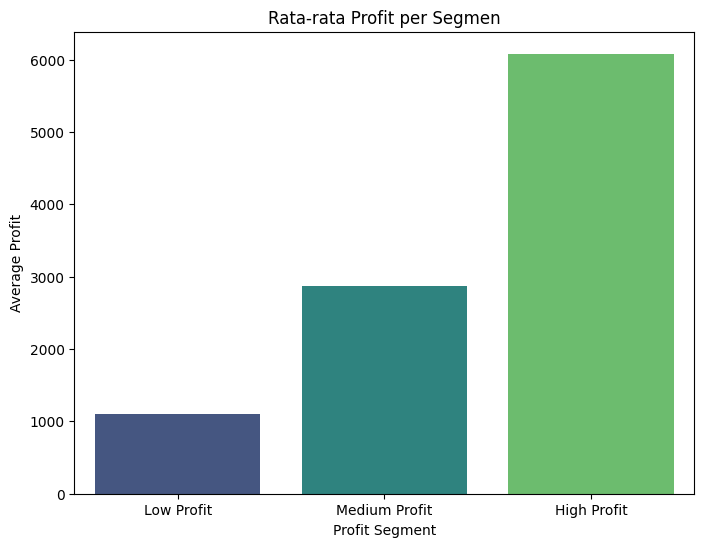

/var/folders/7l/8hp65y4x3nj9c97k5f9jmsvh0000gn/T/ipykernel_14920/2790435746.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_profit_data, x='Profit Segment', y='Profit', palette='viridis')


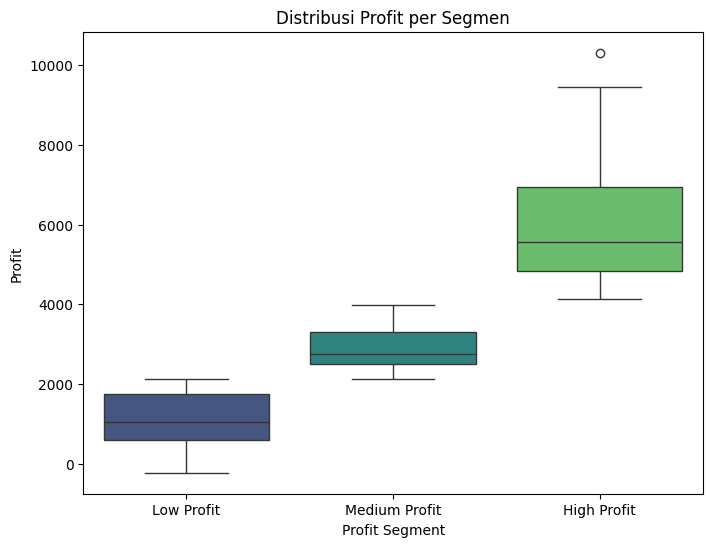

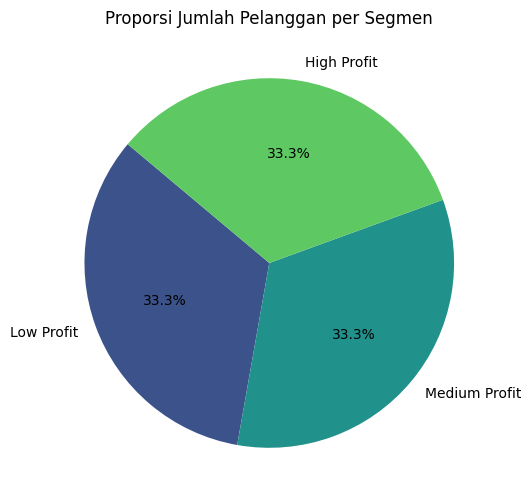

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar Chart - Total Profit per Segmen
plt.figure(figsize=(8, 6))
sns.barplot(x=segmentation_stats.index, y=segmentation_stats['mean'], palette='viridis')
plt.title("Rata-rata Profit per Segmen")
plt.xlabel("Profit Segment")
plt.ylabel("Average Profit")
plt.show()

# 2. Box Plot - Distribusi Profit di Setiap Segmen
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_profit_data, x='Profit Segment', y='Profit', palette='viridis')
plt.title("Distribusi Profit per Segmen")
plt.xlabel("Profit Segment")
plt.ylabel("Profit")
plt.show()

# 3. Pie Chart - Proporsi Jumlah Pelanggan dalam Setiap Segmen
plt.figure(figsize=(8, 6))
customer_counts = customer_profit_data['Profit Segment'].value_counts()
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", 3))
plt.title("Proporsi Jumlah Pelanggan per Segmen")
plt.show()


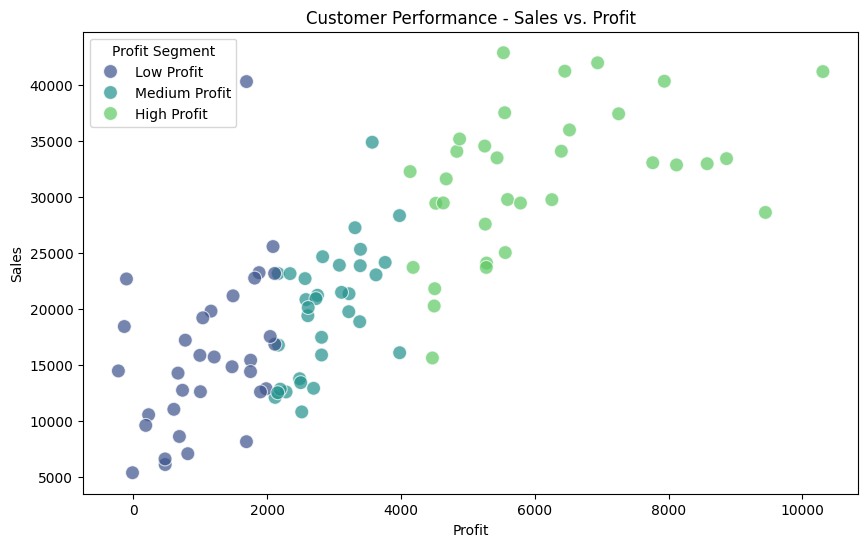

/var/folders/7l/8hp65y4x3nj9c97k5f9jmsvh0000gn/T/ipykernel_14920/2525127334.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_customers, x='Profit', y='Customer', palette='viridis')


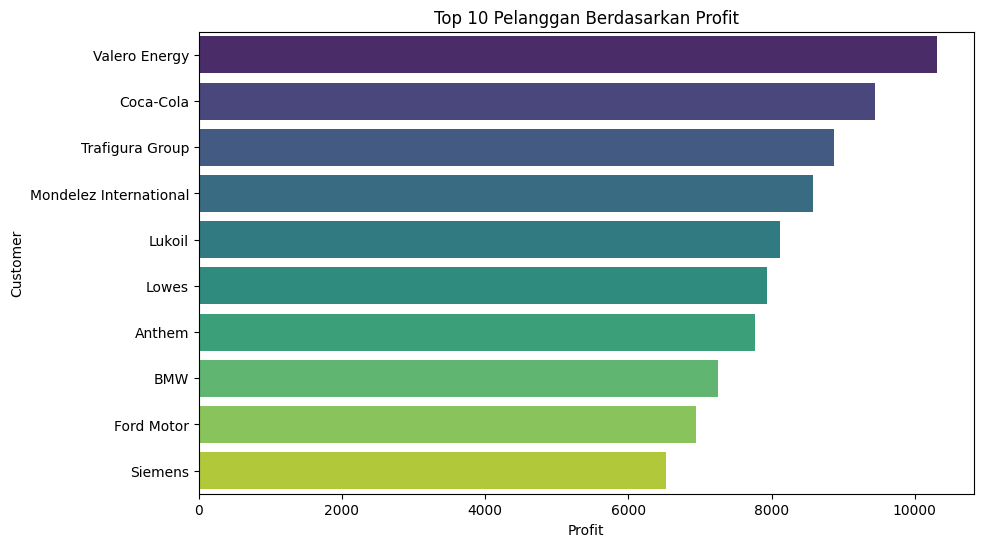

In [71]:
# Mengelompokkan data berdasarkan 'Customer' dan menghitung total profit dan sales untuk setiap pelanggan
customer_performance_data = saas_sales_data_cleaned.groupby('Customer').agg({'Profit': 'sum', 'Sales': 'sum'}).reset_index()

# Menentukan kuantil untuk segmentasi profit
quantiles = customer_performance_data['Profit'].quantile([0.33, 0.67])

# Membuat kolom 'Profit Segment' berdasarkan kuantil
customer_performance_data['Profit Segment'] = pd.cut(
    customer_performance_data['Profit'], 
    bins=[-float('inf'), quantiles.iloc[0], quantiles.iloc[1], float('inf')], 
    labels=['Low Profit', 'Medium Profit', 'High Profit']
)

# 1. Scatter Plot - Performa Pelanggan Berdasarkan Sales dan Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_performance_data, x='Profit', y='Sales', hue='Profit Segment', palette='viridis', s=100, alpha=0.7)
plt.title("Customer Performance - Sales vs. Profit")
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.legend(title="Profit Segment")
plt.show()

# 2. Bar Chart - Top 10 Pelanggan dengan Profit Tertinggi
# Mengambil top 10 pelanggan berdasarkan profit tertinggi
top_10_customers = customer_performance_data.nlargest(10, 'Profit')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_customers, x='Profit', y='Customer', palette='viridis')
plt.title("Top 10 Pelanggan Berdasarkan Profit")
plt.xlabel("Profit")
plt.ylabel("Customer")
plt.show()


Nama kolom dalam dataset:
Index(['Customer', 'Profit', 'Profit Segment'], dtype='object')
Nama kolom setelah penggantian (jika perlu):
Index(['Customer', 'Profit', 'Profit Segment'], dtype='object')

Rata-rata Profit per Segmen:
Insight: Pelanggan dalam segmen 'High Profit' memiliki rata-rata profit yang jauh lebih tinggi dibandingkan segmen lain.


/var/folders/7l/8hp65y4x3nj9c97k5f9jmsvh0000gn/T/ipykernel_14920/2990440076.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit Segment', y='Profit', data=customer_profit_data, estimator=np.mean, palette="viridis")


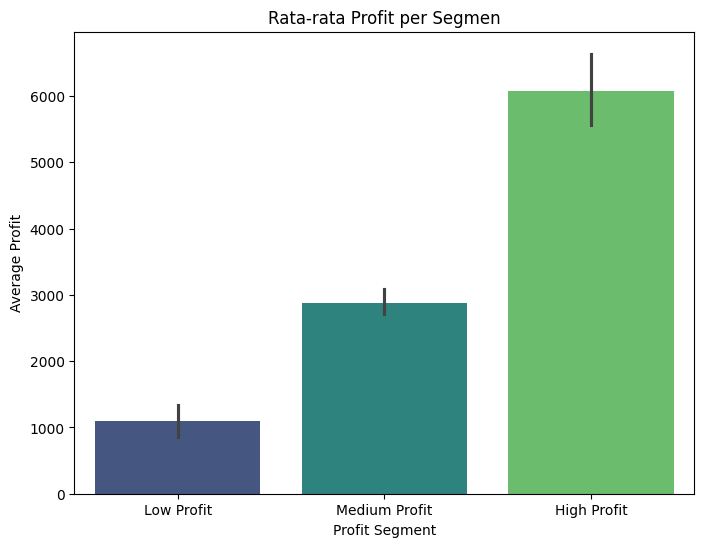


Distribusi Profit per Segmen:
Insight: Box plot menunjukkan bahwa segmen 'High Profit' memiliki median dan rentang profit yang lebih tinggi.


/var/folders/7l/8hp65y4x3nj9c97k5f9jmsvh0000gn/T/ipykernel_14920/2990440076.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Profit Segment', y='Profit', data=customer_profit_data, palette="viridis")


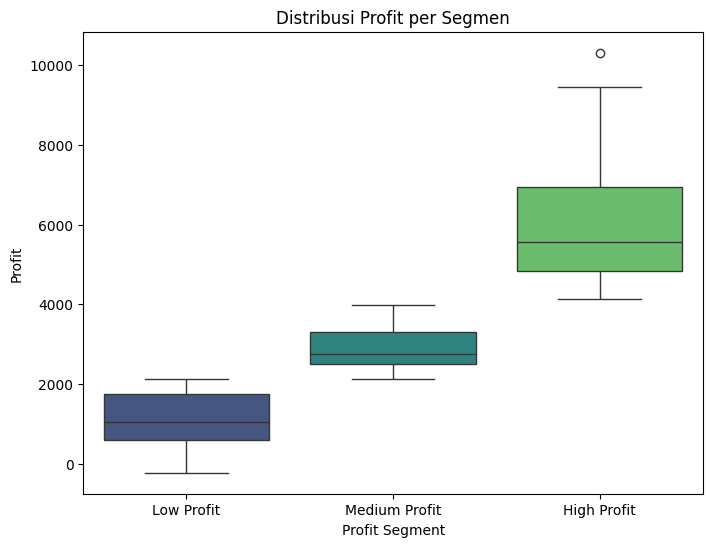


Proporsi Jumlah Pelanggan per Segmen:
Insight: Setiap segmen memiliki proporsi pelanggan yang sama, tetapi segmen 'High Profit' menunjukkan kontribusi profit yang lebih besar.


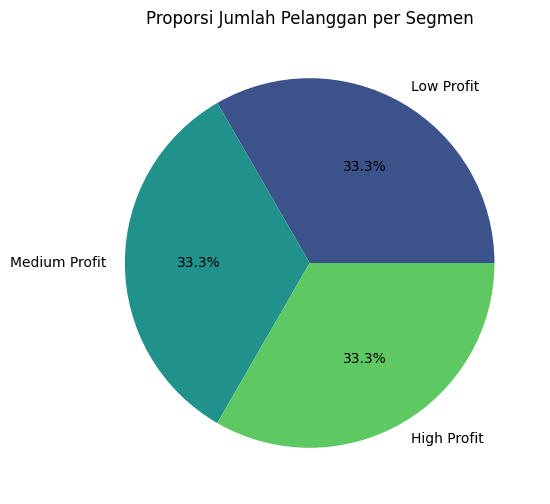

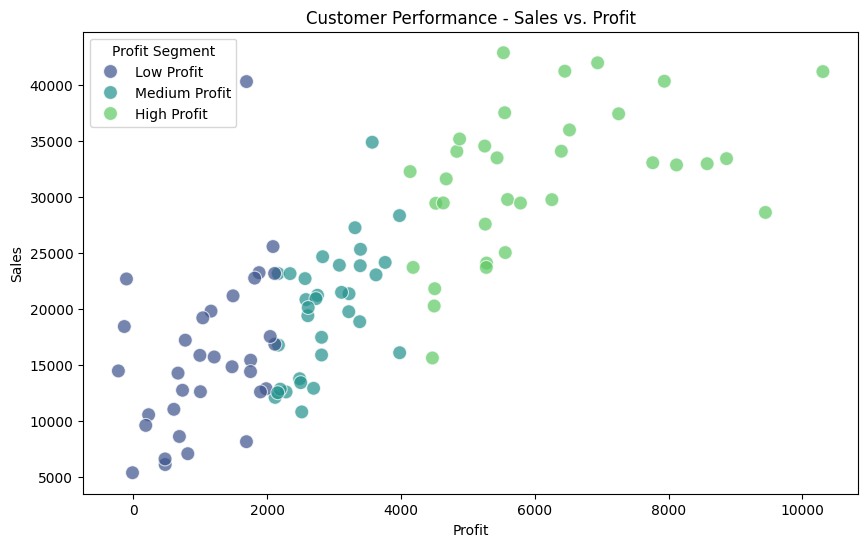


Top 10 Pelanggan Berdasarkan Profit:
Insight: Pelanggan seperti 'Valero Energy', 'Coca-Cola', dan 'Trafigura Group' merupakan kontributor utama dalam profit perusahaan.


/var/folders/7l/8hp65y4x3nj9c97k5f9jmsvh0000gn/T/ipykernel_14920/2990440076.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_customers, x='Profit', y='Customer', palette='viridis')


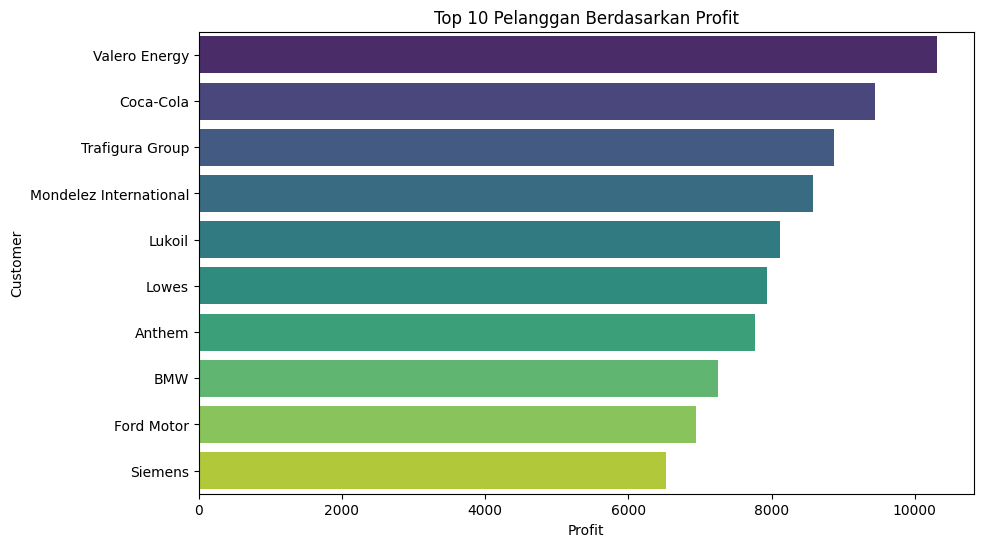

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan customer_profit_data sudah dimuat
# Langkah 1: Periksa nama kolom untuk memastikan 'Sales' dan 'Profit' ada
print("Nama kolom dalam dataset:")
print(customer_profit_data.columns)

# Langkah 2: Ganti nama kolom jika perlu agar sesuai dengan 'Sales' dan 'Profit'
# Ganti 'sales_column_in_your_data' dan 'profit_column_in_your_data' dengan nama kolom sebenarnya jika berbeda
customer_profit_data.rename(columns={
    'sales_column_in_your_data': 'Sales',
    'profit_column_in_your_data': 'Profit'
}, inplace=True)

# Verifikasi kolom setelah penggantian nama
print("Nama kolom setelah penggantian (jika perlu):")
print(customer_profit_data.columns)

# 1. Rata-rata Profit per Segmen
print("\nRata-rata Profit per Segmen:")
print("Insight: Pelanggan dalam segmen 'High Profit' memiliki rata-rata profit yang jauh lebih tinggi dibandingkan segmen lain.")
plt.figure(figsize=(8, 6))
sns.barplot(x='Profit Segment', y='Profit', data=customer_profit_data, estimator=np.mean, palette="viridis")
plt.title("Rata-rata Profit per Segmen")
plt.xlabel("Profit Segment")
plt.ylabel("Average Profit")
plt.show()

# 2. Distribusi Profit per Segmen (Box Plot)
print("\nDistribusi Profit per Segmen:")
print("Insight: Box plot menunjukkan bahwa segmen 'High Profit' memiliki median dan rentang profit yang lebih tinggi.")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Profit Segment', y='Profit', data=customer_profit_data, palette="viridis")
plt.title("Distribusi Profit per Segmen")
plt.xlabel("Profit Segment")
plt.ylabel("Profit")
plt.show()

# 3. Proporsi Jumlah Pelanggan per Segmen (Pie Chart)
print("\nProporsi Jumlah Pelanggan per Segmen:")
print("Insight: Setiap segmen memiliki proporsi pelanggan yang sama, tetapi segmen 'High Profit' menunjukkan kontribusi profit yang lebih besar.")
customer_counts = customer_profit_data['Profit Segment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", 3))
plt.title("Proporsi Jumlah Pelanggan per Segmen")
plt.show()

# 4. Performa Pelanggan - Sales vs. Profit (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_performance_data, x='Profit', y='Sales', hue='Profit Segment', palette='viridis', s=100, alpha=0.7)
plt.title("Customer Performance - Sales vs. Profit")
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.legend(title="Profit Segment")
plt.show()

# 5. Top 10 Pelanggan Berdasarkan Profit (Bar Chart)
print("\nTop 10 Pelanggan Berdasarkan Profit:")
print("Insight: Pelanggan seperti 'Valero Energy', 'Coca-Cola', dan 'Trafigura Group' merupakan kontributor utama dalam profit perusahaan.")
top_10_customers = customer_profit_data.nlargest(10, 'Profit')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_customers, x='Profit', y='Customer', palette='viridis')
plt.title("Top 10 Pelanggan Berdasarkan Profit")
plt.xlabel("Profit")
plt.ylabel("Customer")
plt.show()

## INSIGHT DAN REKOMENDASI ANALISIS SEGMENTASI PELANGGAN BERDASARKAN PROFITABILITAS

Rekomendasi untuk Analisis Profitabilitas Pelanggan:
**Retensi Pelanggan High Profit:**  Fokus pada strategi retensi untuk pelanggan di segmen High Profit, misalnya melalui program loyalitas atau layanan eksklusif, untuk memastikan kontribusi mereka tetap konsisten.
**Optimalisasi Profit untuk Medium Profit:** Pelanggan di segmen Medium Profit berpotensi ditingkatkan ke segmen High Profit. Memberikan diskon atau program insentif bisa meningkatkan volume penjualan mereka dan membawa mereka ke level profit yang lebih tinggi.
**Evaluasi Pelanggan Low Profit:** Untuk pelanggan di segmen Low Profit, evaluasi perlu dilakukan apakah mereka memiliki potensi untuk tumbuh atau sebaiknya difokuskan pada produk yang lebih relevan bagi profitabilitas perusahaan.

## TAHAP 6: ANALISIS EFEKTIVITAS DISKON TERHADAP PENJUALAN DAN PROFIT

Analisis Efektivitas Diskon terhadap Penjualan dan Profitabilitas:
  Discount Category       Sales      Profit
0             0-10%  578.397351   96.055074
1            10-20%  212.375716   25.028489
2            20-30%  454.742974  -45.679636
3            30-40%  504.954482  -92.274348
4            40-50%  414.616541 -211.938084
5              >50%   47.113074  -51.796685

Rata-rata Sales Berdasarkan Kategori Diskon:
Insight: Diskon rendah (0-10% dan 30-40%) meningkatkan penjualan tanpa mengurangi profit secara signifikan. Diskon di atas 50% memiliki penjualan yang sangat rendah.


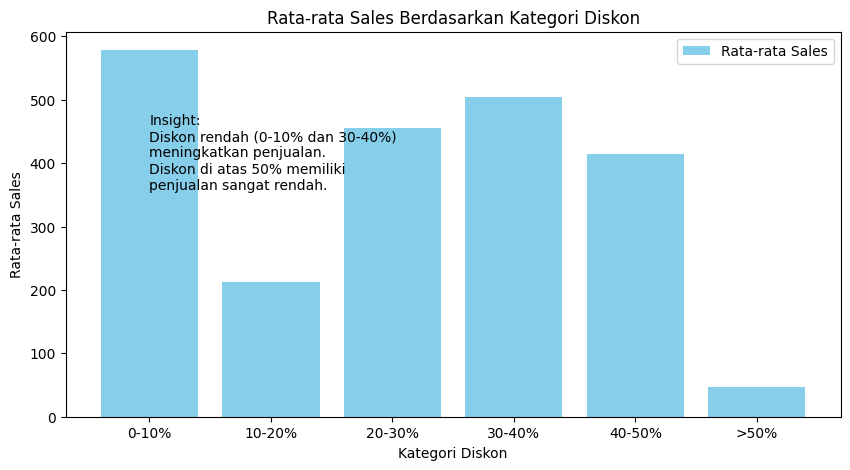


Rata-rata Profit Berdasarkan Kategori Diskon:
Insight: Profit positif terlihat pada diskon rendah (0-10% dan 10-20%). Diskon lebih tinggi dari 30% menghasilkan profit negatif secara signifikan.


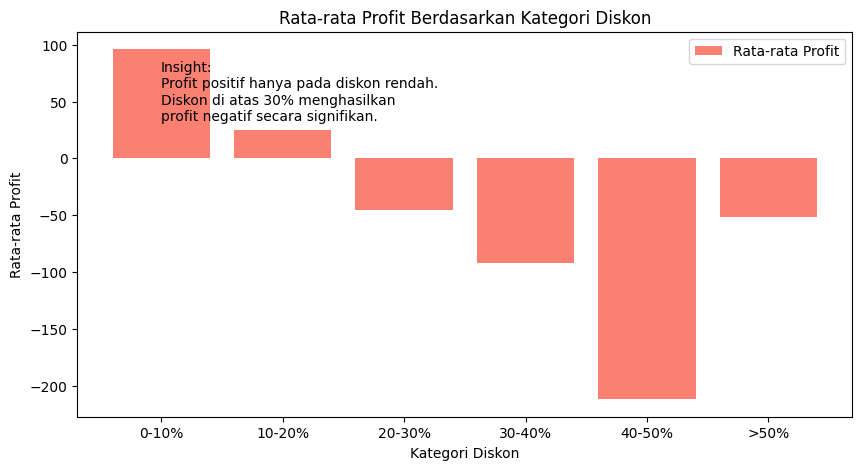

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Menampilkan analisis efektivitas diskon terhadap penjualan dan profitabilitas
print("Analisis Efektivitas Diskon terhadap Penjualan dan Profitabilitas:")
print(discount_analysis)

# Visualisasi Efektivitas Diskon terhadap Penjualan
print("\nRata-rata Sales Berdasarkan Kategori Diskon:")
print("Insight: Diskon rendah (0-10% dan 30-40%) meningkatkan penjualan tanpa mengurangi profit secara signifikan. Diskon di atas 50% memiliki penjualan yang sangat rendah.")
plt.figure(figsize=(10, 5))
plt.bar(discount_analysis['Discount Category'], discount_analysis['Sales'], color='skyblue', label='Rata-rata Sales')
plt.title('Rata-rata Sales Berdasarkan Kategori Diskon')
plt.xlabel('Kategori Diskon')
plt.ylabel('Rata-rata Sales')
plt.legend()
plt.text(0, max(discount_analysis['Sales']) - 100, "Insight:\nDiskon rendah (0-10% dan 30-40%)\nmeningkatkan penjualan.\nDiskon di atas 50% memiliki\npenjualan sangat rendah.", ha='left', va='top', fontsize=10)
plt.show()

# Visualisasi Efektivitas Diskon terhadap Profitabilitas
print("\nRata-rata Profit Berdasarkan Kategori Diskon:")
print("Insight: Profit positif terlihat pada diskon rendah (0-10% dan 10-20%). Diskon lebih tinggi dari 30% menghasilkan profit negatif secara signifikan.")
plt.figure(figsize=(10, 5))
plt.bar(discount_analysis['Discount Category'], discount_analysis['Profit'], color='salmon', label='Rata-rata Profit')
plt.title('Rata-rata Profit Berdasarkan Kategori Diskon')
plt.xlabel('Kategori Diskon')
plt.ylabel('Rata-rata Profit')
plt.legend()
plt.text(0, max(discount_analysis['Profit']) - 10, "Insight:\nProfit positif hanya pada diskon rendah.\nDiskon di atas 30% menghasilkan\nprofit negatif secara signifikan.", ha='left', va='top', fontsize=10)
plt.show()


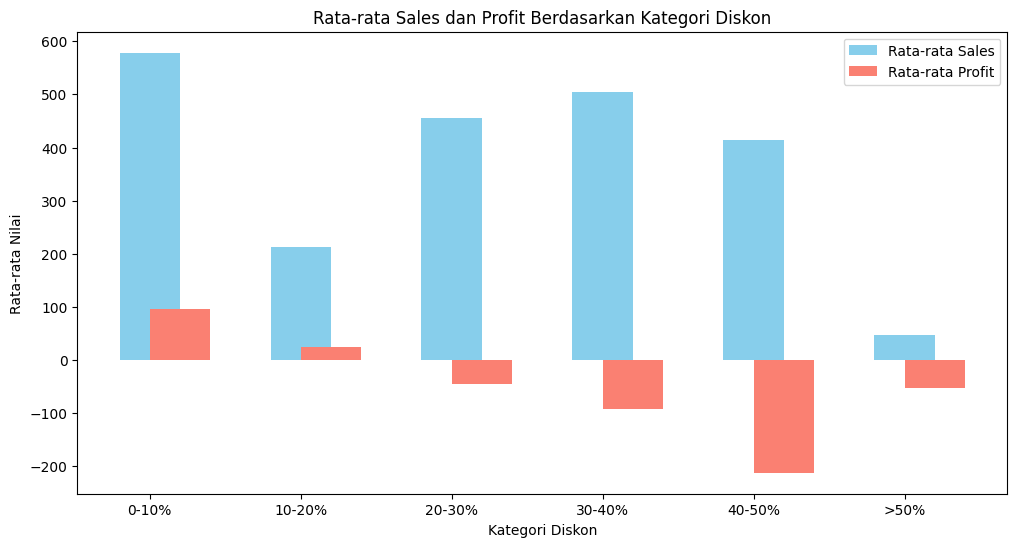


Insight:
- Diskon rendah (0-10% dan 30-40%) cenderung meningkatkan penjualan.
- Diskon tinggi (>30%) memiliki dampak negatif pada profitabilitas.



In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot gabungan untuk rata-rata Sales dan Profit berdasarkan kategori diskon
plt.figure(figsize=(12, 6))

# Bar untuk Rata-rata Sales
plt.bar(discount_analysis['Discount Category'], discount_analysis['Sales'], color='skyblue', label='Rata-rata Sales', width=0.4, align='center')

# Bar untuk Rata-rata Profit (disoffset agar berdampingan)
plt.bar(discount_analysis['Discount Category'], discount_analysis['Profit'], color='salmon', label='Rata-rata Profit', width=0.4, align='edge')

# Menambahkan judul dan label sumbu
plt.title('Rata-rata Sales dan Profit Berdasarkan Kategori Diskon')
plt.xlabel('Kategori Diskon')
plt.ylabel('Rata-rata Nilai')
plt.legend()

# Menampilkan grafik
plt.show()

# Insight sebagai catatan terpisah:
insight = """
Insight:
- Diskon rendah (0-10% dan 30-40%) cenderung meningkatkan penjualan.
- Diskon tinggi (>30%) memiliki dampak negatif pada profitabilitas.
"""
print(insight)


/var/folders/7l/8hp65y4x3nj9c97k5f9jmsvh0000gn/T/ipykernel_14920/3364567628.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Korelasi', y='Nilai Korelasi', data=correlation_df, palette="Blues_d")


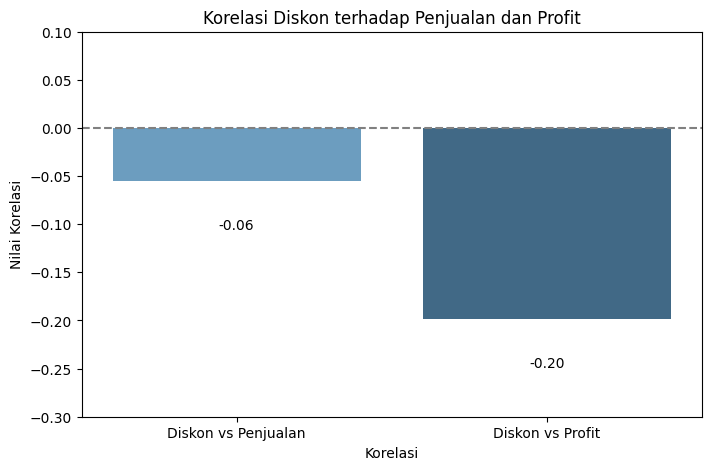


Insight:
1. Korelasi antara diskon dan penjualan adalah -0.05, yang menunjukkan hubungan negatif sangat lemah. 
   Artinya, diskon memiliki pengaruh yang sangat kecil dalam meningkatkan penjualan.
2. Korelasi antara diskon dan profit adalah -0.20, menunjukkan hubungan negatif yang lebih kuat dibandingkan dengan penjualan. 
   Ini berarti semakin tinggi diskon, semakin rendah profitabilitasnya, mungkin karena diskon mengurangi margin keuntungan.
3. P-value sangat kecil (mendekati nol), yang berarti hasil korelasi ini signifikan secara statistik.



In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data korelasi
correlation_data = {
    'Korelasi': ['Diskon vs Penjualan', 'Diskon vs Profit'],
    'Nilai Korelasi': [-0.05516242002413653, -0.19843914548435443]
}

# Membuat DataFrame
correlation_df = pd.DataFrame(correlation_data)

# Visualisasi korelasi
plt.figure(figsize=(8, 5))
sns.barplot(x='Korelasi', y='Nilai Korelasi', data=correlation_df, palette="Blues_d")
plt.title("Korelasi Diskon terhadap Penjualan dan Profit")
plt.ylabel("Nilai Korelasi")
plt.ylim(-0.3, 0.1)  # Menyesuaikan skala agar lebih jelas
plt.axhline(0, color='gray', linestyle='--')

# Menambahkan nilai korelasi pada setiap batang
for index, value in enumerate(correlation_df['Nilai Korelasi']):
    plt.text(index, value - 0.05, f"{value:.2f}", ha='center', color='black')

# Menyimpan insight ke dalam variabel untuk ditampilkan
insight = """
Insight:
1. Korelasi antara diskon dan penjualan adalah -0.05, yang menunjukkan hubungan negatif sangat lemah. 
   Artinya, diskon memiliki pengaruh yang sangat kecil dalam meningkatkan penjualan.
2. Korelasi antara diskon dan profit adalah -0.20, menunjukkan hubungan negatif yang lebih kuat dibandingkan dengan penjualan. 
   Ini berarti semakin tinggi diskon, semakin rendah profitabilitasnya, mungkin karena diskon mengurangi margin keuntungan.
3. P-value sangat kecil (mendekati nol), yang berarti hasil korelasi ini signifikan secara statistik.
"""

# Menampilkan plot dan insight
plt.show()
print(insight)


/var/folders/7l/8hp65y4x3nj9c97k5f9jmsvh0000gn/T/ipykernel_14920/2643903384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saas_sales_data_cleaned['Order Date'] = pd.to_datetime(saas_sales_data_cleaned['Order Date'])
/var/folders/7l/8hp65y4x3nj9c97k5f9jmsvh0000gn/T/ipykernel_14920/2643903384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saas_sales_data_cleaned['Month'] = saas_sales_data_cleaned['Order Date'].dt.to_period('M')
/var/folders/7l/8hp65y4x3nj9c97k5f9jmsvh0000gn/T/ipykernel_14920/264390

Analisis Efektivitas Diskon per Bulan:
                         Sales                                        \
Discount Category       0-10%      10-20%       20-30%       30-40%   
Month                                                                 
2020-01             247.71600   92.590937     0.000000   124.200000   
2020-02               0.00000   65.658800     0.000000     0.000000   
2020-03             366.78600  182.427471   494.321333   898.954500   
2020-04               0.00000  201.224064   405.098400   132.934000   
2020-05               0.00000  176.058279   450.446500   878.318000   
2020-06              65.52000  237.125647   630.063000   421.602900   
2020-07              63.88200  216.380333   478.881200    18.741000   
2020-08             167.53500  184.511298   455.301000   853.092000   
2020-09            1211.29380  153.982613   748.220200   838.757867   
2020-10             589.41000  190.454639   275.779000   719.948000   
2020-11             102.57300  273.27

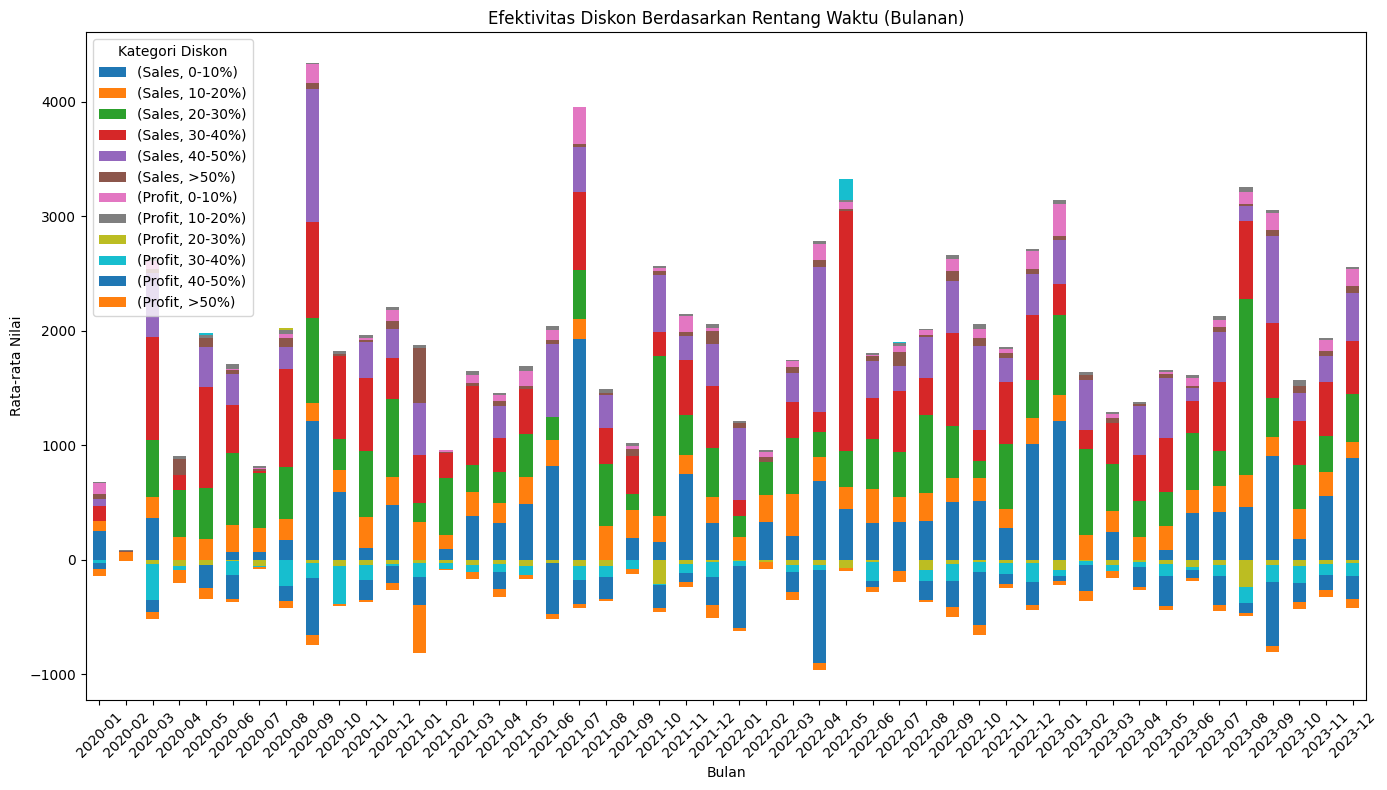

In [82]:
# Pastikan kolom Order Date dalam format datetime
saas_sales_data_cleaned['Order Date'] = pd.to_datetime(saas_sales_data_cleaned['Order Date'])

# Menambahkan kolom bulan
saas_sales_data_cleaned['Month'] = saas_sales_data_cleaned['Order Date'].dt.to_period('M')

# Menghitung rata-rata penjualan dan profit per kategori diskon setiap bulan
discount_monthly_analysis = saas_sales_data_cleaned.groupby(['Month', 'Discount Category']).agg({'Sales': 'mean', 'Profit': 'mean'}).unstack().fillna(0)

print("Analisis Efektivitas Diskon per Bulan:\n", discount_monthly_analysis)

# Visualisasi perubahan efektivitas diskon berdasarkan waktu
discount_monthly_analysis.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title("Efektivitas Diskon Berdasarkan Rentang Waktu (Bulanan)")
plt.ylabel("Rata-rata Nilai")
plt.xlabel("Bulan")
plt.legend(title="Kategori Diskon")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insight:
# Grafik ini menunjukkan bagaimana efektivitas diskon dalam meningkatkan penjualan dan profitabilitas berfluktuasi setiap bulan.
# Ini membantu untuk menentukan kapan diskon lebih efektif sepanjang tahun.


/var/folders/7l/8hp65y4x3nj9c97k5f9jmsvh0000gn/T/ipykernel_14920/2693461969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saas_sales_data_cleaned['Month'] = pd.to_datetime(saas_sales_data_cleaned['Order Date']).dt.to_period("M")
/var/folders/7l/8hp65y4x3nj9c97k5f9jmsvh0000gn/T/ipykernel_14920/2693461969.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_discount_data = saas_sales_data_cleaned.groupby(['Month', 'Discount Category']).agg({


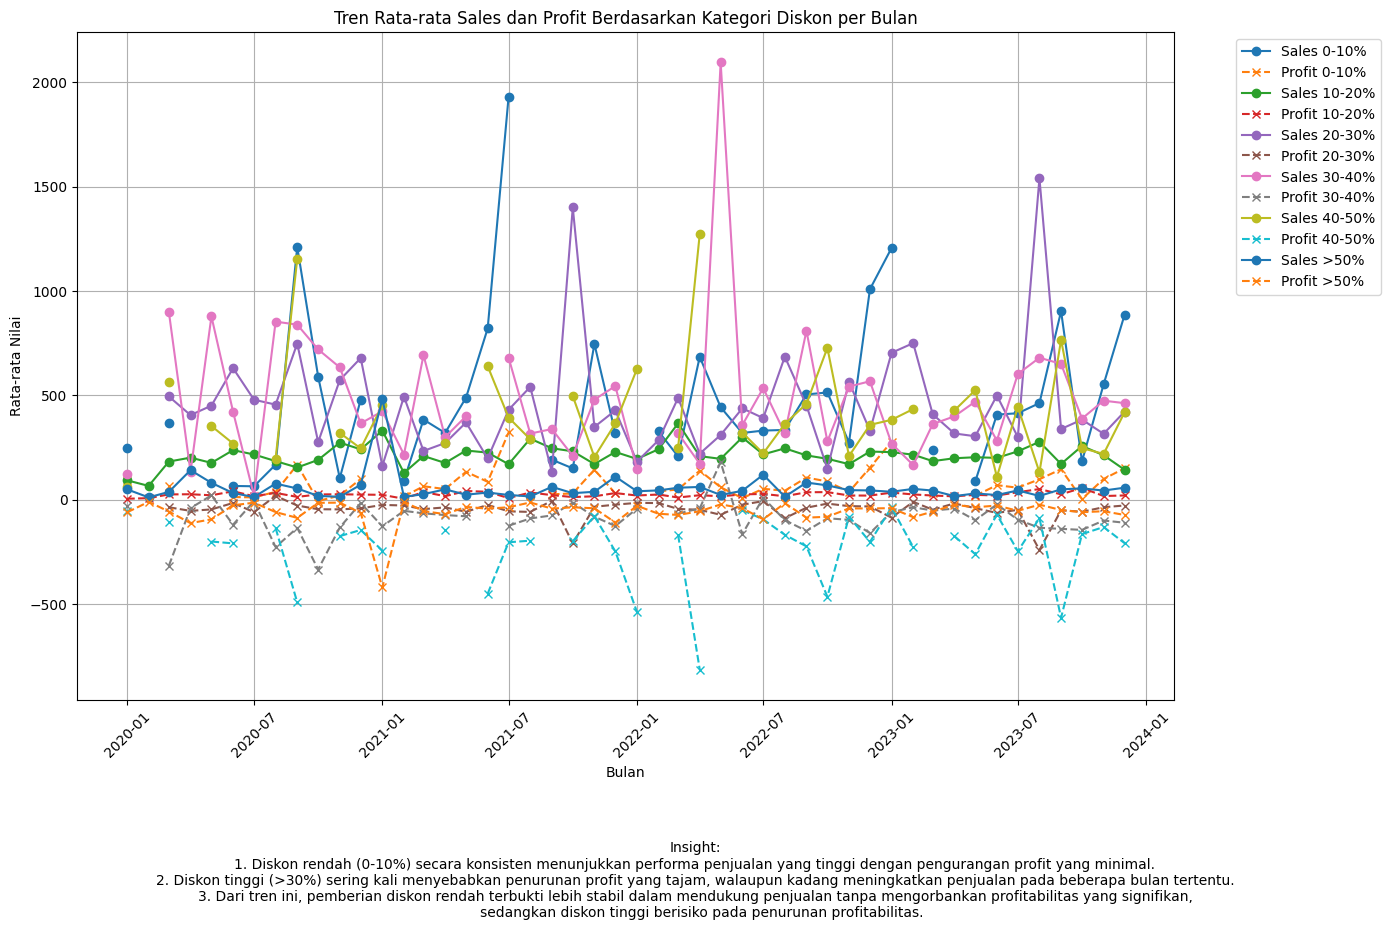

In [86]:
# Pastikan kolom 'Month' dalam format datetime
saas_sales_data_cleaned['Month'] = pd.to_datetime(saas_sales_data_cleaned['Order Date']).dt.to_period("M")

# Agregasi data berdasarkan bulan dan kategori diskon
monthly_discount_data = saas_sales_data_cleaned.groupby(['Month', 'Discount Category']).agg({
    'Sales': 'mean',
    'Profit': 'mean'
}).unstack(level=-1)  # Membuat MultiIndex untuk kolom Discount Category

# Ubah index menjadi datetime untuk plotting
monthly_discount_data.index = monthly_discount_data.index.to_timestamp()

# Plot rata-rata Sales dan Profit per kategori Diskon berdasarkan waktu bulanan
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 8))

# Mengambil kategori diskon unik dari kolom MultiIndex
discount_categories = monthly_discount_data.columns.get_level_values(1).unique()

# Plot untuk setiap kategori diskon
for discount_cat in discount_categories:
    ax.plot(monthly_discount_data.index, monthly_discount_data[('Sales', discount_cat)], label=f'Sales {discount_cat}', linestyle='-', marker='o')
    ax.plot(monthly_discount_data.index, monthly_discount_data[('Profit', discount_cat)], label=f'Profit {discount_cat}', linestyle='--', marker='x')

# Konfigurasi visual
ax.set_title('Tren Rata-rata Sales dan Profit Berdasarkan Kategori Diskon per Bulan')
ax.set_xlabel('Bulan')
ax.set_ylabel('Rata-rata Nilai')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid()

# Menampilkan insight di dalam output
plt.figtext(0.5, -0.15, 'Insight:\n1. Diskon rendah (0-10%) secara konsisten menunjukkan performa penjualan yang tinggi dengan pengurangan profit yang minimal.\n'
             '2. Diskon tinggi (>30%) sering kali menyebabkan penurunan profit yang tajam, walaupun kadang meningkatkan penjualan pada beberapa bulan tertentu.\n'
             '3. Dari tren ini, pemberian diskon rendah terbukti lebih stabil dalam mendukung penjualan tanpa mengorbankan profitabilitas yang signifikan,\n'
             '   sedangkan diskon tinggi berisiko pada penurunan profitabilitas.', wrap=True, ha='center', fontsize=10)

plt.tight_layout()
plt.show()


## INSIGHT & REKOMENDASI BERDASARKAN HASIL ANALISA EFEKTIVITAS DISKON

**Rekomendasi:**
**Optimalkan Diskon pada Rentang 0-10%:**
Karena diskon kecil telah terbukti efektif dalam meningkatkan penjualan sambil menjaga profitabilitas, perusahaan bisa lebih sering memanfaatkan rentang diskon ini untuk promosi.
Pertahankan rentang diskon ini untuk pelanggan yang sensitif terhadap harga, karena masih dapat memberikan kontribusi yang positif pada profit.
**Hati-hati dalam Memberikan Diskon Lebih dari 30%:**
Diskon besar (>30%) berisiko menyebabkan kerugian meskipun volume penjualan mungkin meningkat. Sebaiknya diskon pada rentang ini diberikan hanya pada produk dengan stok berlebih atau dalam situasi promosi khusus.
Untuk meningkatkan efektivitas, diskon besar bisa dikombinasikan dengan strategi lain seperti bundling produk atau memberikan diskon tambahan untuk pembelian volume besar.
**Evaluasi Diskon pada Periode Waktu Tertentu:**
Mengingat efektivitas diskon dapat bervariasi per bulan, perusahaan disarankan untuk melakukan analisis per musim atau per kuartal agar diskon dapat disesuaikan dengan tren penjualan musiman.
Dengan menerapkan strategi diskon yang berbeda pada periode penjualan yang lambat dan cepat, perusahaan dapat lebih memaksimalkan margin keuntungan sepanjang tahun.

## TAHAP 6: ANALISA Perbandingan Margin Keuntungan Antar Produk

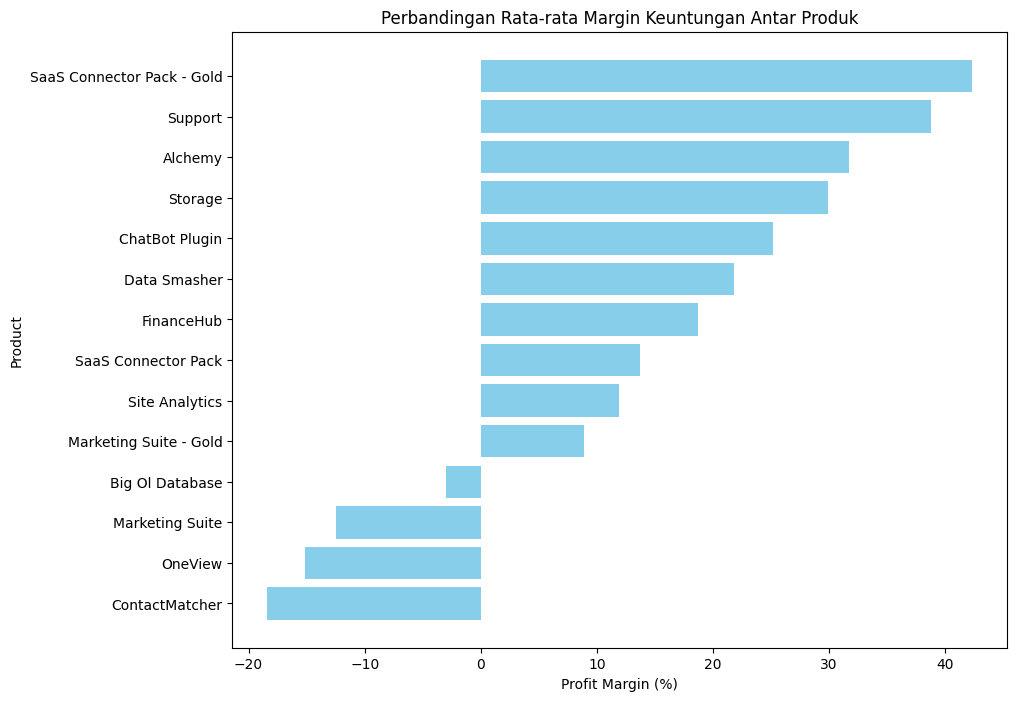

Analisis Rata-rata Margin Keuntungan per Produk:
                       Product  Profit Margin (%)
0   SaaS Connector Pack - Gold              42.31
1                      Support              38.78
2                      Alchemy              31.71
3                      Storage              29.92
4               ChatBot Plugin              25.16
5                 Data Smasher              21.82
6                   FinanceHub              18.70
7          SaaS Connector Pack              13.70
8               Site Analytics              11.92
9       Marketing Suite - Gold               8.91
10             Big Ol Database              -3.01
11             Marketing Suite             -12.48
12                     OneView             -15.17
13              ContactMatcher             -18.38

Insight:
1. Produk dengan margin keuntungan tertinggi adalah "SaaS Connector Pack - Gold" dengan profit margin di atas 40%.
2. Produk seperti "Support" dan "Alchemy" juga memiliki margin tinggi di ata

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Analisis Margin Keuntungan per Produk
product_profit_margin = {
    'Product': [
        'SaaS Connector Pack - Gold', 'Support', 'Alchemy', 'Storage', 
        'ChatBot Plugin', 'Data Smasher', 'FinanceHub', 'SaaS Connector Pack', 
        'Site Analytics', 'Marketing Suite - Gold', 'Big Ol Database', 
        'Marketing Suite', 'OneView', 'ContactMatcher'
    ],
    'Profit Margin (%)': [
        42.31, 38.78, 31.71, 29.92, 25.16, 21.82, 18.70, 13.70, 
        11.92, 8.91, -3.01, -12.48, -15.17, -18.38
    ]
}

# Membuat DataFrame
df_product_margin = pd.DataFrame(product_profit_margin)

# Menambahkan Insight
insight = """
Insight:
1. Produk dengan margin keuntungan tertinggi adalah "SaaS Connector Pack - Gold" dengan profit margin di atas 40%.
2. Produk seperti "Support" dan "Alchemy" juga memiliki margin tinggi di atas 30%, berpotensi dikembangkan lebih lanjut.
3. Produk seperti "Marketing Suite" dan "ContactMatcher" menunjukkan margin negatif, artinya produk ini menghasilkan kerugian.
4. Rekomendasi:
   - Perbaiki strategi harga untuk produk dengan margin negatif.
   - Kurangi biaya operasional atau produksi jika memungkinkan.
   - Evaluasi ulang fitur atau nilai produk yang kurang menguntungkan.
"""

# Plotting Data
plt.figure(figsize=(10, 8))
plt.barh(df_product_margin['Product'], df_product_margin['Profit Margin (%)'], color='skyblue')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Product')
plt.title('Perbandingan Rata-rata Margin Keuntungan Antar Produk')
plt.gca().invert_yaxis()
plt.show()

# Menampilkan Insight
print("Analisis Rata-rata Margin Keuntungan per Produk:")
print(df_product_margin)
print(insight)


In [90]:
# Menghitung total Sales dan Profit untuk keseluruhan dataset
total_sales = saas_sales_data_cleaned['Sales'].sum()
total_profit = saas_sales_data_cleaned['Profit'].sum()

# Menghitung kontribusi setiap produk terhadap total Sales dan Profit
product_contribution = saas_sales_data_cleaned.groupby('Product').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Menambahkan kolom kontribusi terhadap total revenue dan profit
product_contribution['Revenue_Contribution (%)'] = (product_contribution['Total_Sales'] / total_sales) * 100
product_contribution['Profit_Contribution (%)'] = (product_contribution['Total_Profit'] / total_profit) * 100

# Mengurutkan berdasarkan kontribusi revenue
product_contribution_sorted = product_contribution.sort_values(by='Revenue_Contribution (%)', ascending=False)

# Menampilkan hasil
print("Analisis Kontribusi Produk terhadap Total Revenue dan Profitabilitas Perusahaan:")
print(product_contribution_sorted)

# Insight
print("\nInsight:")
print("Produk yang memiliki kontribusi terbesar terhadap total pendapatan adalah produk-produk yang menyumbang persentase revenue tertinggi.")
print("Namun, penting untuk melihat kontribusi profit untuk memastikan produk tersebut juga menguntungkan. Jika ada produk dengan kontribusi revenue tinggi tetapi kontribusi profit rendah atau negatif, produk tersebut bisa menjadi kandidat untuk evaluasi lebih lanjut.")
print("Produk-produk dengan kontribusi tinggi pada revenue dan profit perlu dipertahankan dan mungkin dapat ditingkatkan pemasarannya.")


Analisis Kontribusi Produk terhadap Total Revenue dan Profitabilitas Perusahaan:
                       Product  Total_Sales  Total_Profit  \
3               ContactMatcher  388473.0740    34538.1855   
5                   FinanceHub  340935.4150    32136.4203   
11              Site Analytics  330007.0540    44515.7306   
7       Marketing Suite - Gold  223843.6080    21278.8264   
4                 Data Smasher  167380.3180    41936.6357   
0                      Alchemy  149528.0300    55617.8249   
1              Big Ol Database  141590.2550    23035.7669   
13                     Support  120489.0080    33913.8104   
6              Marketing Suite  111796.5663    -1807.5038   
8                      OneView  107068.9130    19319.2878   
9          SaaS Connector Pack   91705.1640    13059.1436   
2               ChatBot Plugin   27118.7920     6527.7870   
10  SaaS Connector Pack - Gold   16476.4020     6964.1767   
12                     Storage    3024.2800      949.5182   

   

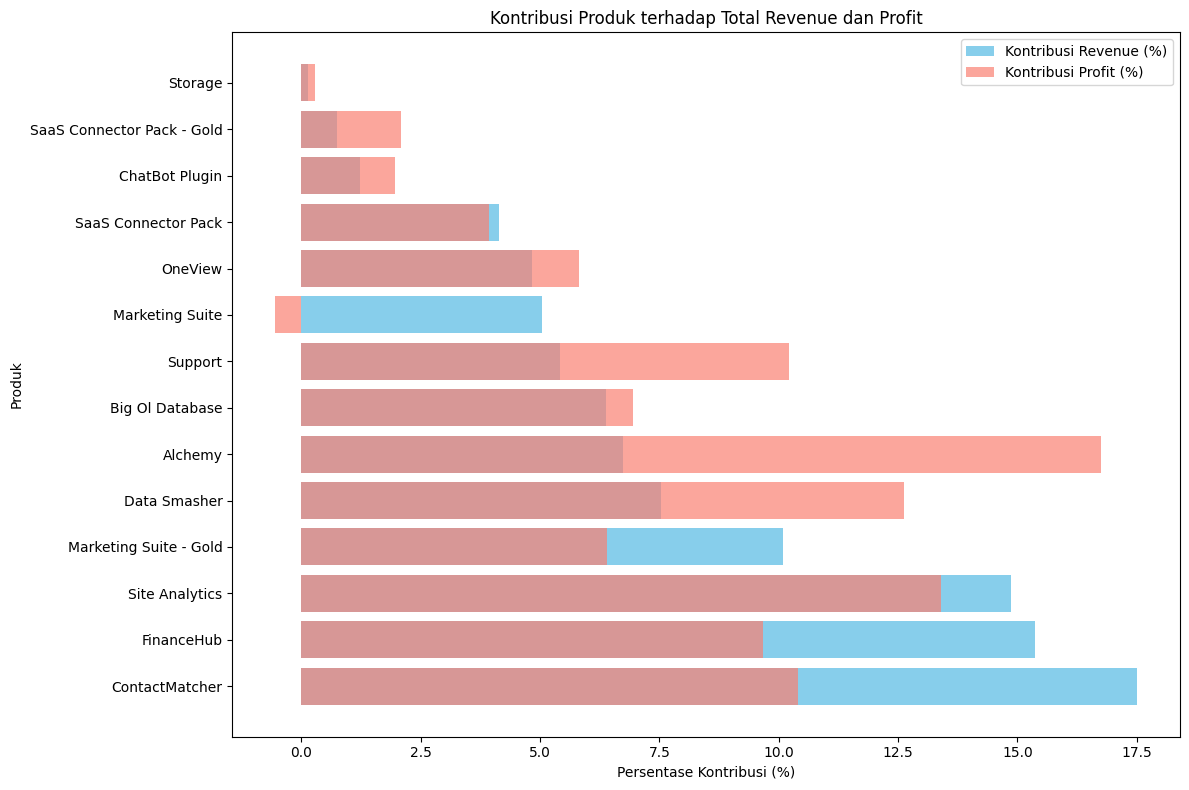

In [91]:
import matplotlib.pyplot as plt

# Visualisasi Kontribusi Revenue dan Profit per Produk
plt.figure(figsize=(12, 8))

# Grafik untuk kontribusi revenue
plt.barh(product_contribution_sorted['Product'], product_contribution_sorted['Revenue_Contribution (%)'], 
         color='skyblue', label='Kontribusi Revenue (%)')

# Grafik untuk kontribusi profit
plt.barh(product_contribution_sorted['Product'], product_contribution_sorted['Profit_Contribution (%)'], 
         color='salmon', label='Kontribusi Profit (%)', alpha=0.7)

# Menambahkan keterangan
plt.xlabel('Persentase Kontribusi (%)')
plt.ylabel('Produk')
plt.title('Kontribusi Produk terhadap Total Revenue dan Profit')
plt.legend(loc='upper right')

# Menampilkan plot
plt.tight_layout()
plt.show()


## INSIGHT & REKOMENDASI

**Insight:**
**Produk Mengun**tungkan:** Produk seperti SaaS Connector Pack - Gold, Support, dan Alchemy memiliki margin keuntungan tinggi (>30%), memberikan kontribusi positif pada profitabilitas.
**Produk Rugi:** Marketing Suite, OneView, dan ContactMatcher menunjukkan margin negatif, menandakan biaya yang lebih besar daripada pendapatan.
**Distribusi Margin:** Terdapat variasi signifikan pada margin antar produk, menunjukkan kontribusi yang tidak merata terhadap profitabilitas perusahaan.
**Rekomendasi:**
**Perluas Produk Untung:** Pertimbangkan ekspansi dan promosi lebih lanjut untuk produk dengan margin tinggi.
**Evaluasi Produk Rugi:** Tinjau kembali produk dengan margin negatif; pertimbangkan optimasi biaya atau perubahan strategi harga.
Fokus Pemasaran pada Produk Menguntungkan: Prioritaskan upaya pemasaran untuk produk yang menunjukkan profitabilitas tinggi.

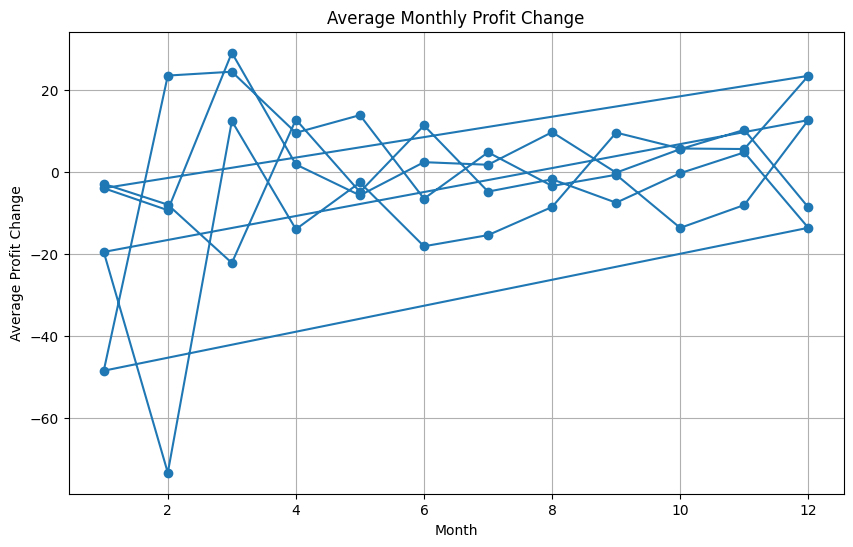

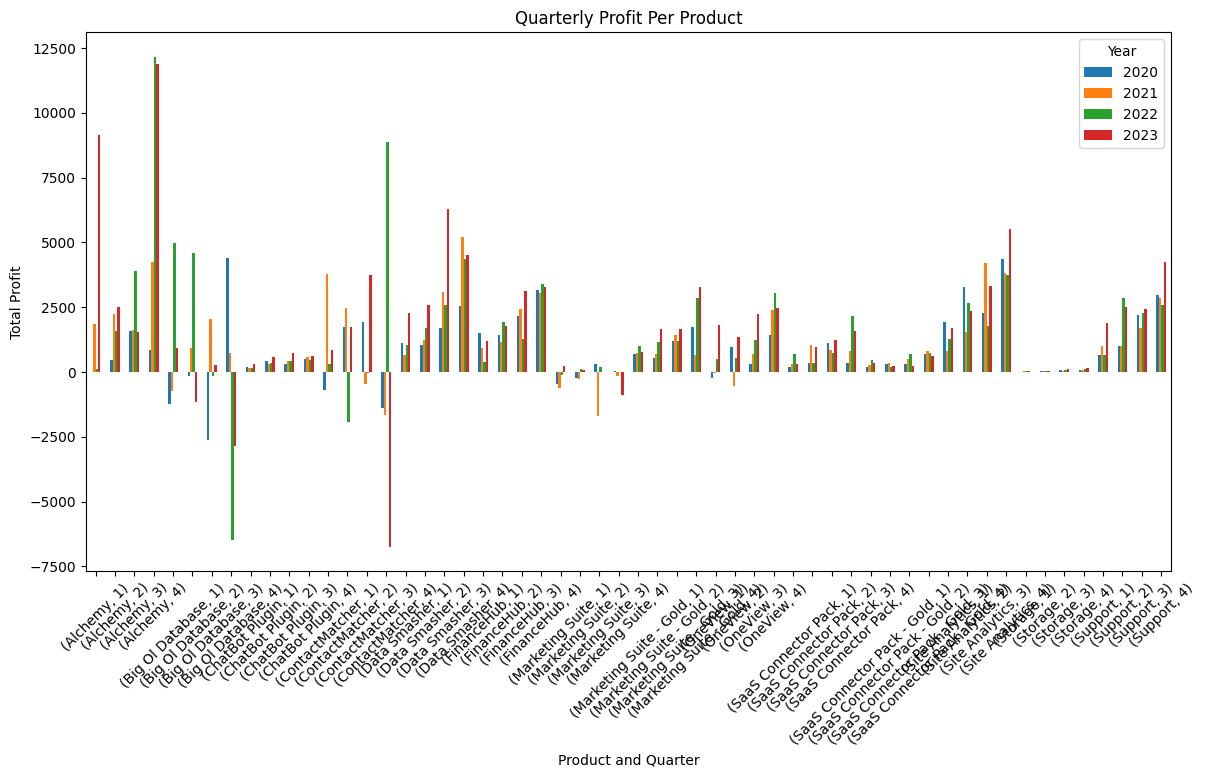

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
customer_profit_data = pd.read_csv('/Users/mhusnimaulana/Downloads/SaaS-Sales.csv')

# Convert 'Order Date' to datetime
customer_profit_data['Order Date'] = pd.to_datetime(customer_profit_data['Order Date'])

# Add year, month, and quarter columns
customer_profit_data['Year'] = customer_profit_data['Order Date'].dt.year
customer_profit_data['Month'] = customer_profit_data['Order Date'].dt.month
customer_profit_data['Quarter'] = customer_profit_data['Order Date'].dt.quarter

# Calculate monthly profit change
customer_profit_data['Monthly Profit Change'] = customer_profit_data.groupby('Customer ID')['Profit'].transform(lambda x: x.diff())

# Plot the average monthly profit change
avg_monthly_profit_change = customer_profit_data.groupby(['Year', 'Month'])['Monthly Profit Change'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(avg_monthly_profit_change['Month'], avg_monthly_profit_change['Monthly Profit Change'], marker='o')
plt.title('Average Monthly Profit Change')
plt.xlabel('Month')
plt.ylabel('Average Profit Change')
plt.grid(True)
plt.show()

# Analyze quarterly profit per product
quarterly_profit_per_product = customer_profit_data.groupby(['Product', 'Quarter', 'Year'])['Profit'].sum().unstack(fill_value=0)
quarterly_profit_per_product.plot(kind='bar', figsize=(14, 7), title='Quarterly Profit Per Product')
plt.xlabel('Product and Quarter')
plt.ylabel('Total Profit')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()


## PEMBUATAN DATASET BARU BERISI SEGMENTASI

In [126]:
import pandas as pd
import numpy as np

# Memuat dataset asli
saas_sales_data = pd.read_csv('/Users/mhusnimaulana/Downloads/SaaS-Sales.csv')

# Menghitung total profit per pelanggan
customer_profit_data = saas_sales_data.groupby('Customer')['Profit'].sum().reset_index()

# Mendefinisikan batas untuk segmentasi
low_threshold = customer_profit_data['Profit'].quantile(0.33)
high_threshold = customer_profit_data['Profit'].quantile(0.67)

# Fungsi untuk mengklasifikasikan segmen pelanggan
def profit_segment(profit):
    if profit >= high_threshold:
        return 'High Profit'
    elif profit <= low_threshold:
        return 'Low Profit'
    else:
        return 'Medium Profit'

# Menerapkan segmentasi berdasarkan profit
customer_profit_data['Profit Segment'] = customer_profit_data['Profit'].apply(profit_segment)

# Menyimpan dataset baru dengan segmentasi ke dalam CSV
customer_profit_data.to_csv('/Users/mhusnimaulana/Downloads/Customer_Segmentation.csv', index=False)


In [129]:
import pandas as pd

# 1. Memuat data
file_path = '/Users/mhusnimaulana/Downloads/SaaS-Sales.csv'
saas_sales_data = pd.read_csv(file_path)

# 2. Mengonversi kolom 'Order Date' ke format datetime
saas_sales_data['Order Date'] = pd.to_datetime(saas_sales_data['Order Date'], errors='coerce')
print("\nData types setelah konversi kolom 'Order Date':")
print(saas_sales_data.dtypes)

# 3. Memeriksa dan menghapus baris duplikat
initial_shape = saas_sales_data.shape
saas_sales_data = saas_sales_data.drop_duplicates()
print(f"\nJumlah baris yang dihapus karena duplikasi: {initial_shape[0] - saas_sales_data.shape[0]}")

# 4. Memeriksa nilai hilang dan menghapus baris dengan nilai hilang pada kolom penting
print("\nJumlah nilai hilang per kolom:")
print(saas_sales_data.isnull().sum())
saas_sales_data = saas_sales_data.dropna(subset=['Order Date', 'Sales', 'Profit', 'Quantity'])

# 5. Memeriksa nilai negatif pada kolom numerik dan menetapkan ambang batas untuk nilai ekstrem
print("\nMemeriksa nilai negatif pada kolom numerik:")
negative_sales = (saas_sales_data['Sales'] < 0).sum()
negative_quantity = (saas_sales_data['Quantity'] < 0).sum()
negative_profit = (saas_sales_data['Profit'] < 0).sum()
print(f"Negative Sales values: {negative_sales}")
print(f"Negative Quantity values: {negative_quantity}")
print(f"Negative Profit values: {negative_profit}")

# 6. Menghapus nilai ekstrim pada kolom 'Sales' dan 'Profit' (misalnya di bawah -1000 atau di atas ambang tertentu)
profit_threshold = -1000  # Nilai ambang profit negatif ekstrem
sales_upper_threshold = saas_sales_data['Sales'].quantile(0.99)  # Ambang batas atas untuk outlier
profit_upper_threshold = saas_sales_data['Profit'].quantile(0.99)  # Ambang batas atas untuk profit

# Filter data berdasarkan ambang batas yang telah ditetapkan
saas_sales_data_cleaned = saas_sales_data[
    (saas_sales_data['Profit'] >= profit_threshold) &
    (saas_sales_data['Sales'] <= sales_upper_threshold) &
    (saas_sales_data['Profit'] <= profit_upper_threshold)
]

# 7. Menampilkan informasi setelah pembersihan
print("\nJumlah data setelah pembersihan:")
print(saas_sales_data_cleaned.shape)
print("\nBeberapa baris pertama dari data bersih:")
print(saas_sales_data_cleaned.head())

# 8. Mengekspor data bersih ke file Excel
output_path = '/Users/mhusnimaulana/Downloads/Cleaned_SaaS_Sales_Data.xlsx'
saas_sales_data_cleaned.to_excel(output_path, index=False)
print(f"\nData bersih berhasil diekspor ke: {output_path}")



Data types setelah konversi kolom 'Order Date':
Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key                 int64
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID              int64
Industry                object
Segment                 object
Product                 object
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

Jumlah baris yang dihapus karena duplikasi: 0

Jumlah nilai hilang per kolom:
Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0

In [130]:
# Memeriksa apakah masih ada nilai profit negatif ekstrem setelah pembersihan
extreme_negative_profit = saas_sales_data_cleaned[saas_sales_data_cleaned['Profit'] < -1000]

if extreme_negative_profit.empty:
    print("Tidak ada nilai profit negatif ekstrem (di bawah -1000) dalam data bersih.")
else:
    print("Nilai profit negatif ekstrem yang masih ada dalam data bersih:")
    print(extreme_negative_profit)


Tidak ada nilai profit negatif ekstrem (di bawah -1000) dalam data bersih.


In [132]:
import pandas as pd

# Membaca data dari file Excel
file_path = '/Users/mhusnimaulana/Downloads/Cleaned_SaaS_Sales_Data.xlsx'
saas_sales_data = pd.read_excel(file_path)

# Mengonversi 'Order Date' menjadi tipe datetime
saas_sales_data['Order Date'] = pd.to_datetime(saas_sales_data['Order Date'], errors='coerce')

# Membersihkan data negatif ekstrem pada kolom 'Profit' dengan ambang batas -1000
profit_threshold = -1000
saas_sales_data_cleaned = saas_sales_data[saas_sales_data['Profit'] >= profit_threshold]

# Mengonversi kolom 'Discount' ke bentuk persentase
saas_sales_data_cleaned['Discount Percentage'] = (saas_sales_data_cleaned['Discount'] * 100).round()

# Menghapus kolom asli 'Discount' jika tidak diperlukan
saas_sales_data_cleaned.drop(columns=['Discount'], inplace=True)

# Menyimpan hasil ke file Excel
output_path = '/Users/mhusnimaulana/Downloads/SaaS_Sales_Cleaned_with_Percent_Discount.xlsx'
saas_sales_data_cleaned.to_excel(output_path, index=False)

print(f"Data berhasil diekspor ke file Excel: {output_path}")


Data berhasil diekspor ke file Excel: /Users/mhusnimaulana/Downloads/SaaS_Sales_Cleaned_with_Percent_Discount.xlsx
